In [20]:
import pandas as pd
import math
from PIL import Image
import io
import os
import cv2
import glob
from Ipython.display import display


ModuleNotFoundError: No module named 'Ipython'

In [50]:
pip install scikit-image

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 113.1 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 133.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
file="/fsx1/encode/Image_records/iPhone_processed"

In [ ]:
for (dirpath, dirnames, filenames) in os.walk(file):
        img_files = os.path.join(dirpath, "*.jpg")
        for img_file in glob.glob(img_files):
            print(img_file)
            img = cv2.imread(img_file)
            cv2.imshow('image', img)
            break

/fsx1/encode/Image_records/iPhone_processed/1_1_iphone.jpg


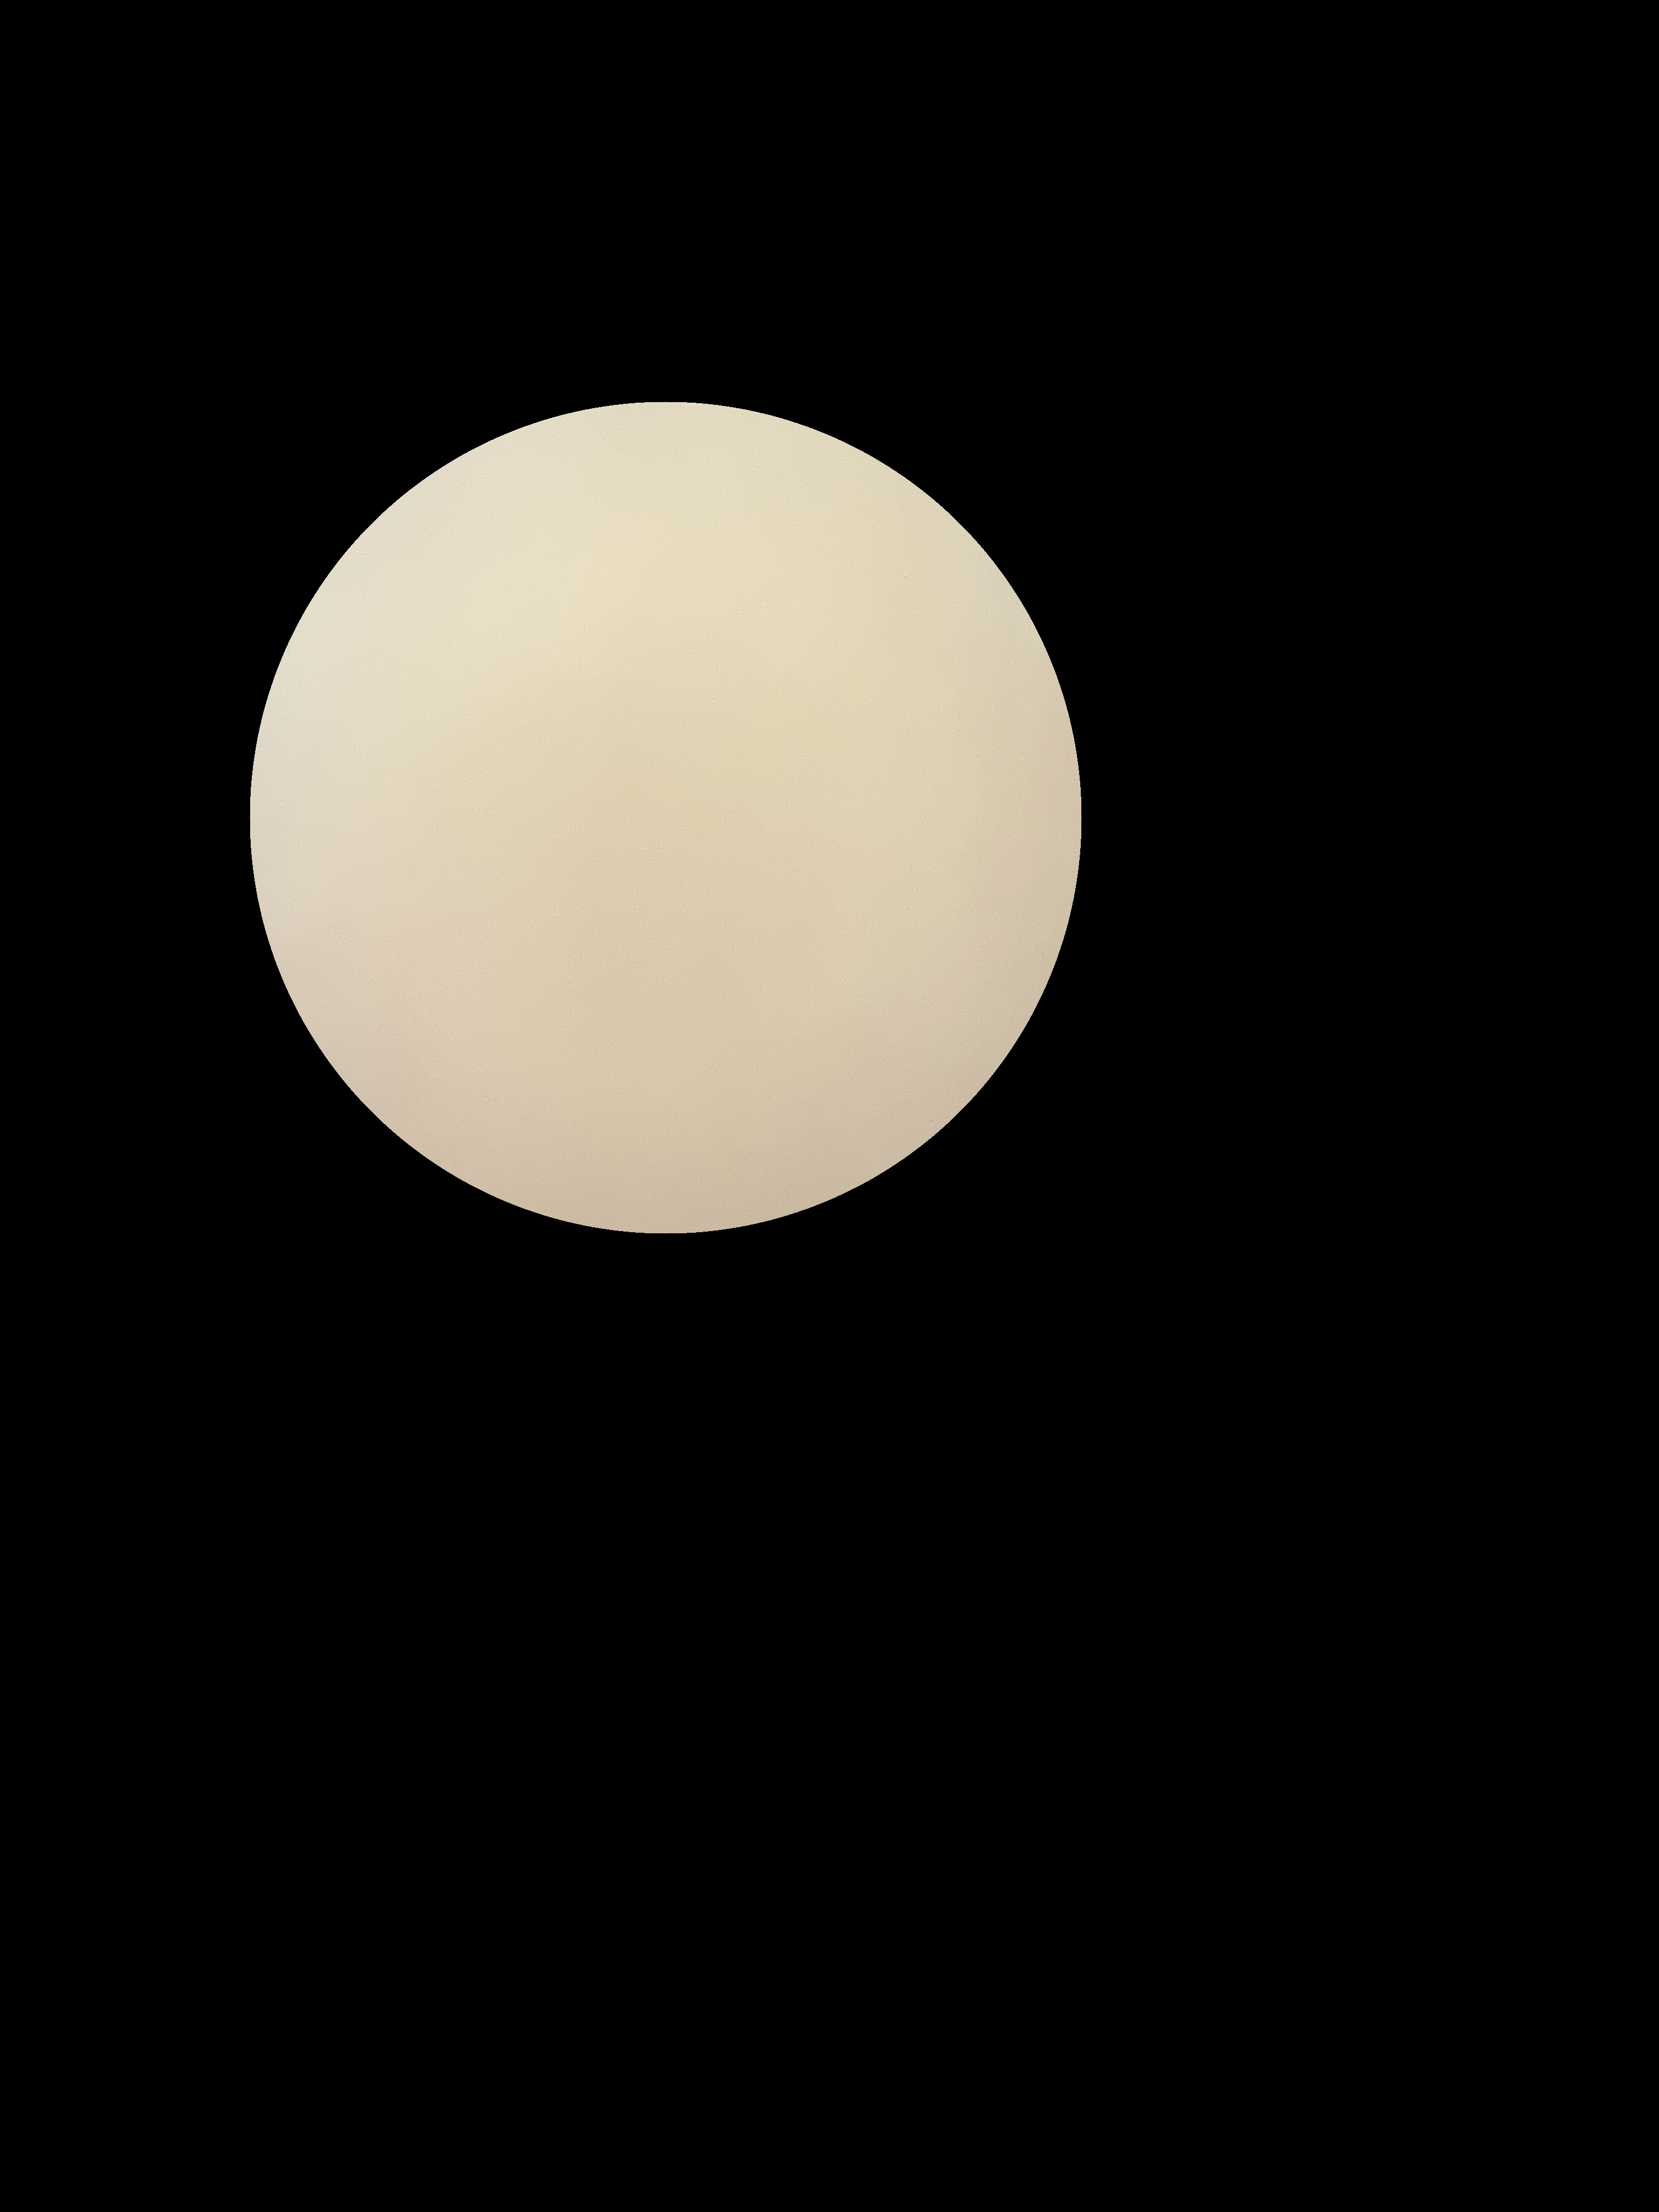

In [26]:
from PIL import Image as PILImage
from IPython.display import display
import cv2
import os
import glob

for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*.jpg")
    for img_file in glob.glob(img_files):
        k= "/fsx1/encode/Image_records/iPhone_processed/1_1_iphone.jpg"
        print(k)
        img = cv2.imread(k)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        pil_img = PILImage.fromarray(img_rgb)
        
        display(pil_img)
        break 
        


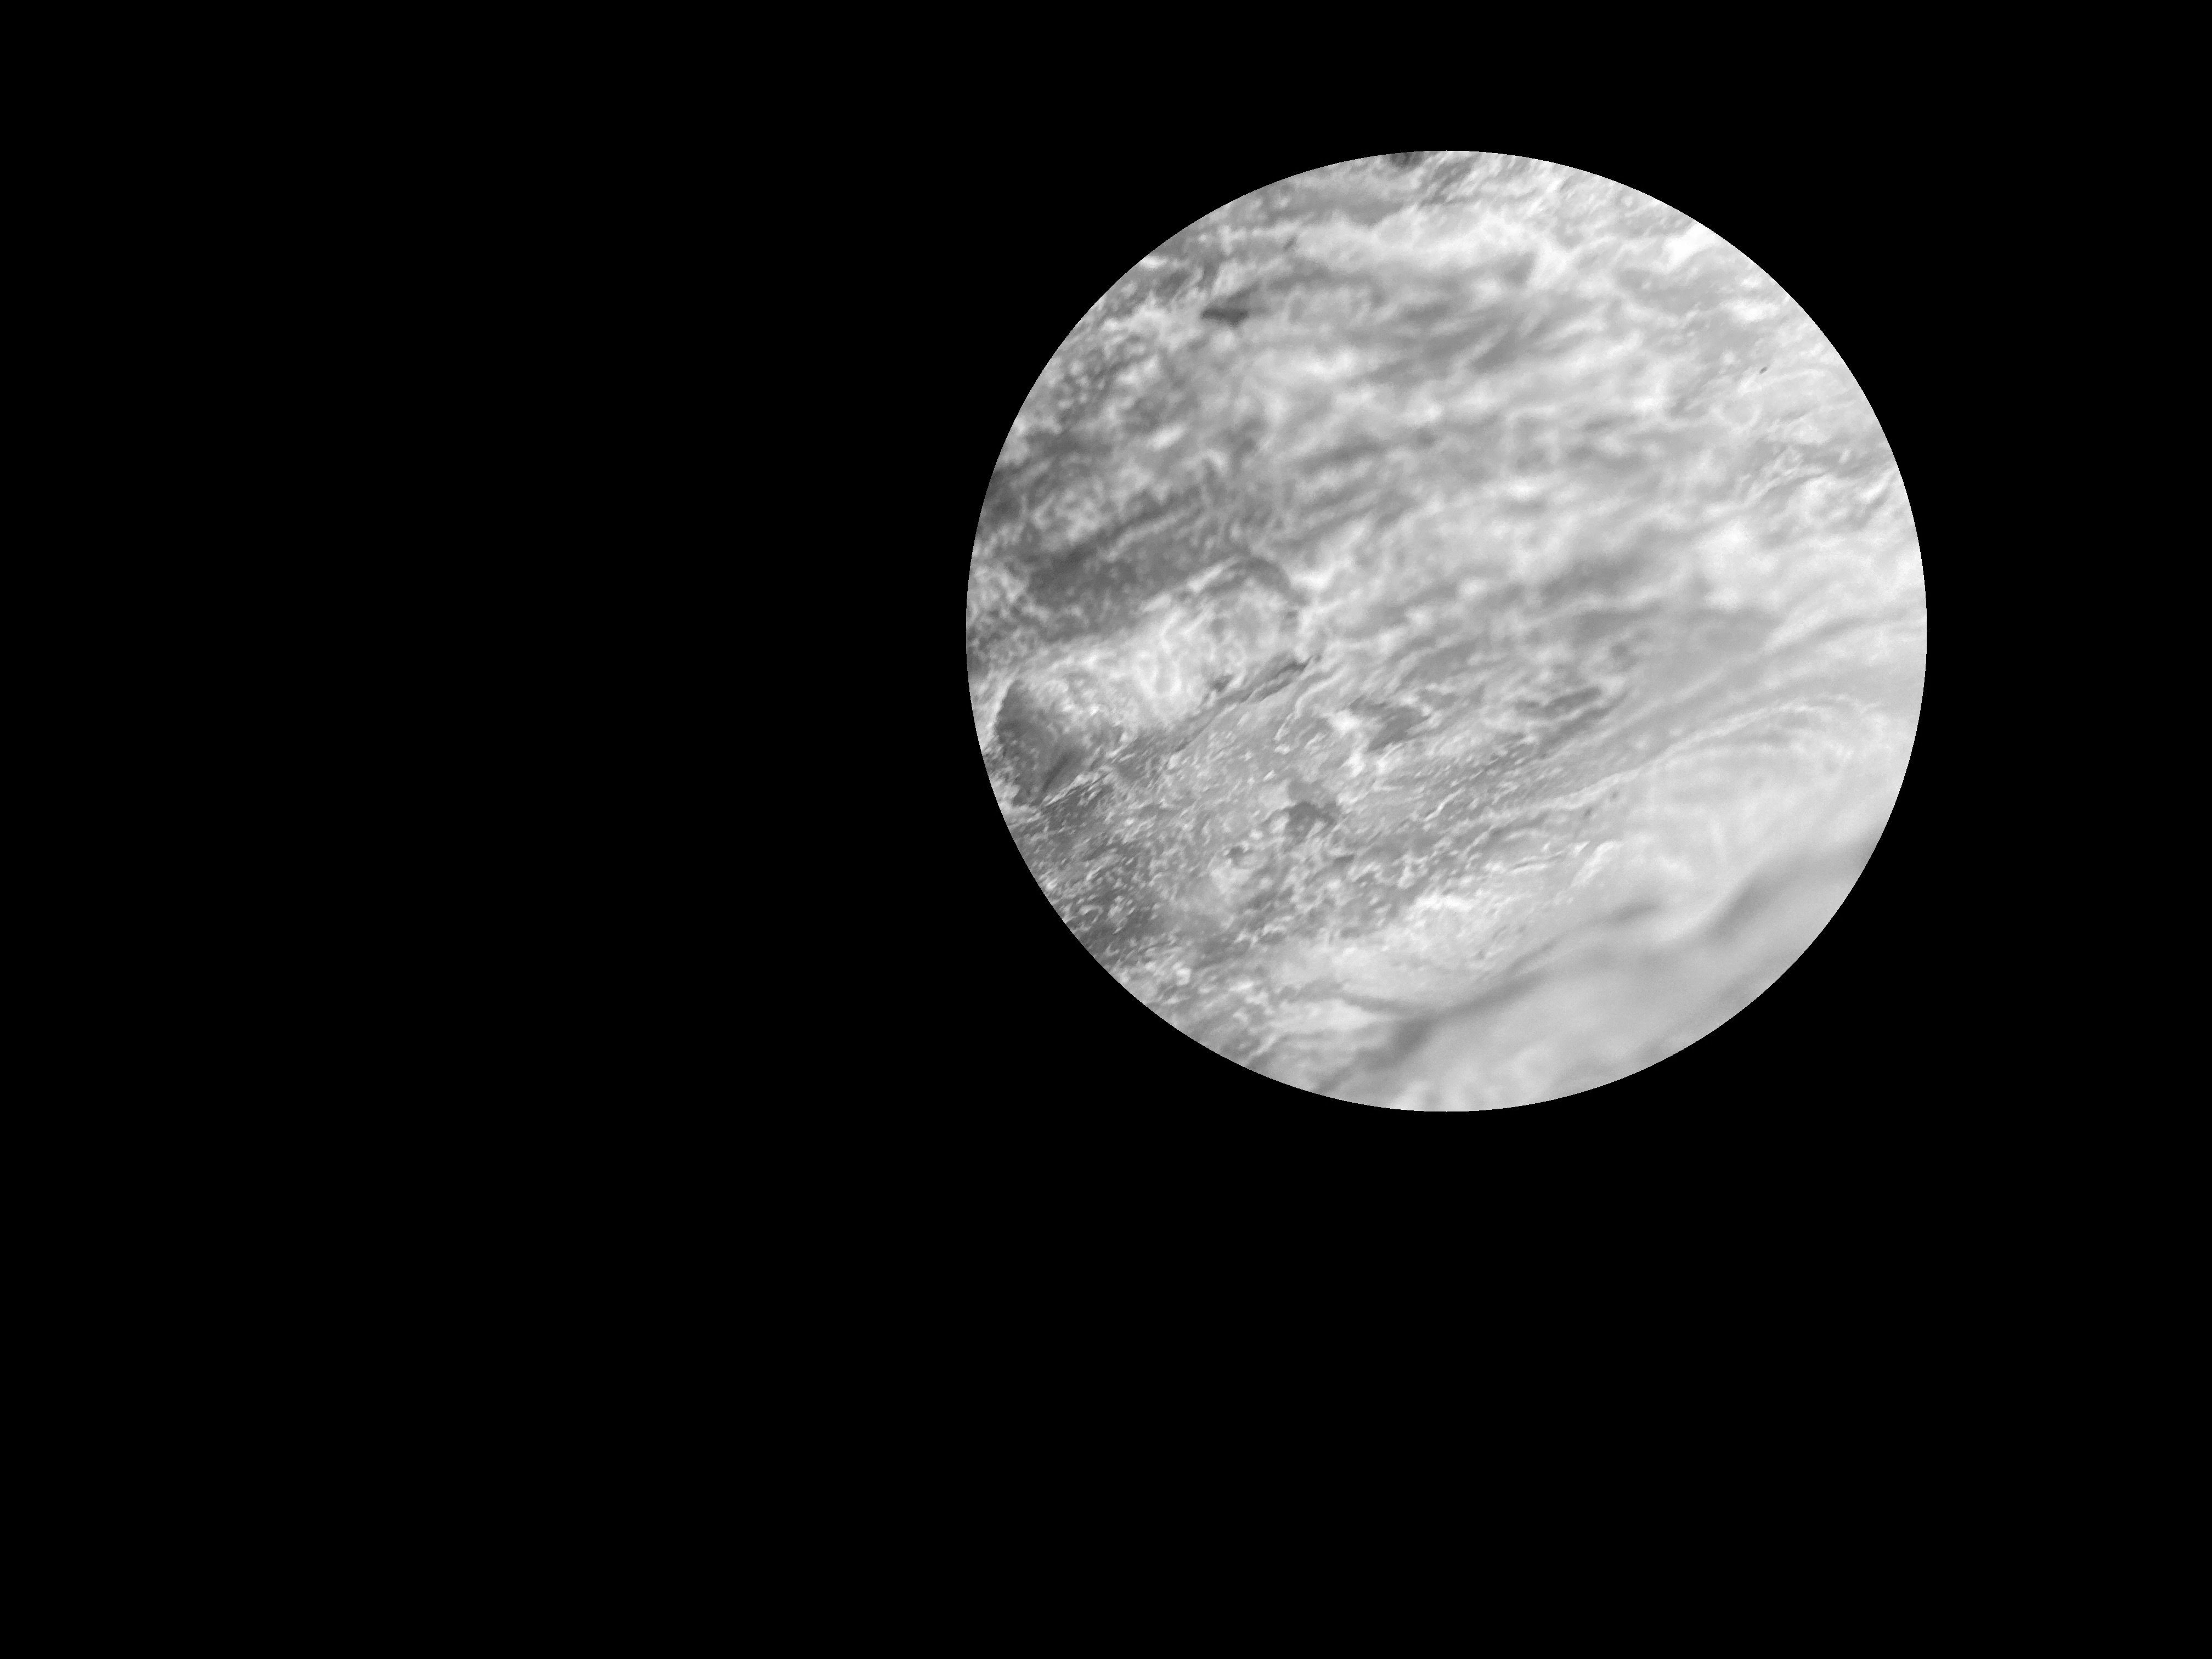

PermissionError: [Errno 13] Permission denied: '/fsx1/encode/Image_records/iPhone_processed/grayscale_10_15_iphone.jpg'

In [27]:
from PIL import Image as PILImage
from IPython.display import display
import cv2
import os
import glob

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*.jpg")
    for img_file in glob.glob(img_files):
        # Read the image using OpenCV
        img = cv2.imread(img_file)
        
        # Convert the image to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Convert the grayscale image to a PIL image for display
        pil_img = PILImage.fromarray(img_gray)
        
        # Display the grayscale image (optional)
        display(pil_img)
        
        # Optionally, save the grayscale image with a modified filename
        grayscale_path = os.path.join(dirpath, "grayscale_" + os.path.basename(img_file))
        pil_img.save(grayscale_path)
        
        print(f"Converted and saved: {grayscale_path}")


In [44]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
file = "/fsx1/encode/Image_records/iPhone_processed"

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

/fsx1/encode/Image_records/iPhone_processed/10_15_iphone.jpg
<class 'numpy.ndarray'>
(3024, 4032, 3)
254.97449999999998
0.0
[0.587 0.587 0.587 ... 0.228 0.228 0.228]


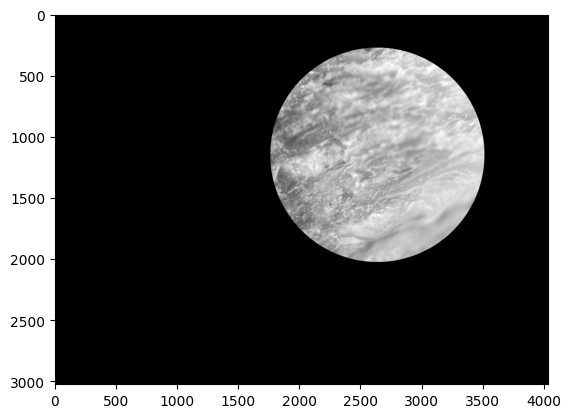

In [48]:
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*.jpg")
    for img_file in glob.glob(img_files):
        print(img_file)
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(type(img_gray)) ##type of image##
        print(img_rgb.shape) ##image shape##
        print(np.max(np.unique(img_gray))) ##check max intensity values##
        print(np.min(np.unique(img_gray))) ##check min intensity values##
        if (np.isnan(img_gray)==True).any(): ##no nan values##
            print("found")
        mask=img_gray[img_gray != 0]
        print(mask)
        #pil_img = PILImage.fromarray(img_gray)
        #display(img_gray)
        plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
        plt.show()
        break

/fsx1/encode/Image_records/iPhone_processed/10_15_iphone.jpg
<class 'numpy.ndarray'>
(3024, 4032, 3)
1.0
0.0


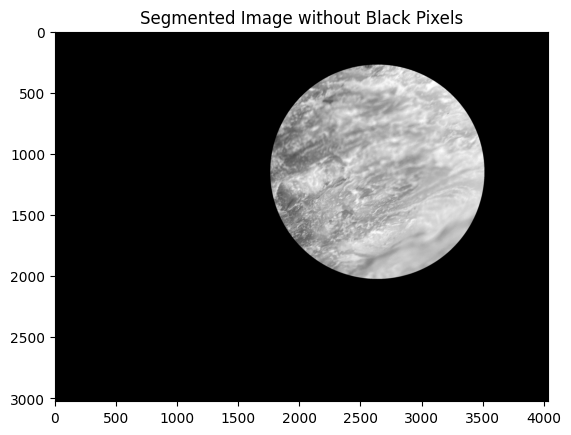

In [1]:
import numpy as np
import cv2
import os
import glob
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*.jpg")
    for img_file in glob.glob(img_files):
        print(img_file)
        
        # Read the image using OpenCV
        img = cv2.imread(img_file)
        
        # Convert the image from BGR to RGB
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Convert the RGB image to grayscale
        img_gray = rgb2gray(img_rgb)
        
        # Print information about the image
        print(type(img_gray))  # Type of image
        print(img_rgb.shape)  # Image shape
        print(np.max(np.unique(img_gray)))  # Max intensity values
        print(np.min(np.unique(img_gray)))  # Min intensity values

        # Check for NaN values
        if np.isnan(img_gray).any():
            print("Found NaN values")

        # Apply mask to remove black (intensity 0)
        mask = img_gray > 0  # Mask of non-black pixels (True where intensity > 0)
        img_segmented = np.zeros_like(img_gray)  # Initialize a blank image
        img_segmented[mask] = img_gray[mask]  # Copy non-black pixels
        
        # Display the segmented image
        plt.imshow(img_segmented, cmap=plt.get_cmap('gray'))
        plt.title("Segmented Image without Black Pixels")
        plt.show()
        
        break  # Remove or adjust this break to process more images


In [18]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image as PILImage
#3: palm left dorsal
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_12_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(img_file)
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(type(img_gray)) ##type of image##
        print(img_gray.shape) ##image shape##
        print(np.max(np.unique(img_gray))) ##check max intensity values##
        print(np.min(np.unique(img_gray))) ##check min intensity values##
        if (np.isnan(img_gray)==True).any(): ##no nan values##
            print("found")
        # Step 1: Find non-zero (or non-background) pixels
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        # Step 2: Determine the bounding box of non-background area
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        # Step 3: Crop the image to this bounding box
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        # Display the cropped image
        # plt.imshow(cropped_img, cmap='gray')
        # plt.show()
        # pil_img = PILImage.fromarray(img_gray)
        # display(img_gray)
        # plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
        # plt.show()
        # break


/fsx1/encode/Image_records/iPhone_processed/56_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
253.10569999999998
0.0
/fsx1/encode/Image_records/iPhone_processed/23_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
246.2141
0.0
/fsx1/encode/Image_records/iPhone_processed/42_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.97449999999998
0.0
/fsx1/encode/Image_records/iPhone_processed/121_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.97449999999998
0.0
/fsx1/encode/Image_records/iPhone_processed/37_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
247.3837
0.0
/fsx1/encode/Image_records/iPhone_processed/80_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
249.64829999999998
0.0
/fsx1/encode/Image_records/iPhone_processed/94_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.97449999999998
0.0
/fsx1/encode/Image_records/iPhone_processed/109_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
250.2047
0.0
/fsx1/encode/Image_records/iPhone_processed/47_12_iphone.jpg

In [20]:
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_12_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(img_file)
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(type(img_gray)) ##type of image##
        print(img_gray.shape) ##image shape##
        print(np.max(np.unique(img_gray))) ##check max intensity values##
        print(np.min(np.unique(img_gray))) ##check min intensity values##
        if (np.isnan(img_gray)==True).any(): ##no nan values##
            print("found")
        ###cropping image
        # Step 1: Find non-zero (or non-background) pixels
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        # Step 2: Determine the bounding box of non-background area
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        # Step 3: Crop the image to this bounding box
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        ###normalization
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Processed Image: (mean={cropped_img.mean():.2f}, std={cropped_img.std():.2f})")
        print(f"Standardized Image: (mean={standard_img.mean():.2f}, std={standard_img.std():.2f})")
        threshold_value = 0.1  # You can adjust this value based on your needs
        # Step 2: Create the mask
        mask = cropped_img > threshold_value  # Pixels greater than the threshold become True
        # Step 3: Convert the boolean mask to an integer mask (optional)
        mask = mask.astype(np.uint8)  # Convert boolean to 0 and 1 (optional)
        # Display the mask
        #plt.imshow(mask, cmap='gray')
        #plt.show()
        # fig, axs = plt.subplots(1, 3, dpi=300, constrained_layout=True, sharey=True)
        # axs[0].imshow(cropped_img, 'gray')
        # axs[1].imshow(standard_img, 'gray')
        # axs[2].imshow(mask, 'gray')
        # axs[0].set_title("Processed Image")
        # axs[1].set_title("Standardized Image")
        # axs[2].set_title("Mask of Image")
        # plt.show()
        # Display the cropped image
        #plt.imshow(cropped_img, cmap='gray')
        #plt.show()
        #pil_img = PILImage.fromarray(img_gray)
        #display(img_gray)
        #plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
        #plt.show()
        # break

/fsx1/encode/Image_records/iPhone_processed/56_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
253.10569999999998
0.0
Processed Image: (mean=157.11, std=86.86)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/23_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
246.2141
0.0
Processed Image: (mean=151.40, std=82.95)
Standardized Image: (mean=0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/42_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.97449999999998
0.0
Processed Image: (mean=145.14, std=80.99)
Standardized Image: (mean=0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/121_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.97449999999998
0.0
Processed Image: (mean=162.28, std=88.22)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/37_12_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
247.3837
0.0
Processed Image: (mean=166.85, std=90.85)
Standardized Image: (mean=0.00, st

In [22]:
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_3_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(img_file)
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(type(img_gray)) ##type of image##
        print(img_gray.shape) ##image shape##
        print(np.max(np.unique(img_gray))) ##check max intensity values##
        print(np.min(np.unique(img_gray))) ##check min intensity values##
        if (np.isnan(img_gray)==True).any(): ##no nan values##
            print("found")
        ###cropping image
        # Step 1: Find non-zero (or non-background) pixels
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        # Step 2: Determine the bounding box of non-background area
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        # Step 3: Crop the image to this bounding box
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        ###normalization
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Processed Image: (mean={cropped_img.mean():.2f}, std={cropped_img.std():.2f})")
        print(f"Standardized Image: (mean={standard_img.mean():.2f}, std={standard_img.std():.2f})")
        threshold_value = 0.1  # You can adjust this value based on your needs
        # Step 2: Create the mask
        mask = cropped_img > threshold_value  # Pixels greater than the threshold become True
        # Step 3: Convert the boolean mask to an integer mask (optional)
        mask = mask.astype(np.uint8)  # Convert boolean to 0 and 1 (optional)
        # Display the mask
        #plt.imshow(mask, cmap='gray')
        #plt.show()
        # fig, axs = plt.subplots(1, 3, dpi=300, constrained_layout=True, sharey=True)
        # axs[0].imshow(cropped_img, 'gray')
        # axs[1].imshow(standard_img, 'gray')
        # axs[2].imshow(mask, 'gray')
        # axs[0].set_title("Processed Image")
        # axs[1].set_title("Standardized Image")
        # axs[2].set_title("Mask of Image")
        # plt.show()
        # Display the cropped image
        #plt.imshow(cropped_img, cmap='gray')
        #plt.show()
        #pil_img = PILImage.fromarray(img_gray)
        #display(img_gray)
        #plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
        #plt.show()
        # break

/fsx1/encode/Image_records/iPhone_processed/76_3_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.97449999999998
0.0
Processed Image: (mean=147.63, std=83.24)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/25_3_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.7465
0.0
Processed Image: (mean=160.55, std=87.65)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/124_3_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.97449999999998
0.0
Processed Image: (mean=154.09, std=84.70)
Standardized Image: (mean=0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/83_3_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
250.0136
0.0
Processed Image: (mean=162.41, std=89.74)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/82_3_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
247.92759999999998
0.0
Processed Image: (mean=170.70, std=93.39)
Standardized Image: (mean=-0.00, std=1

In [23]:
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_7_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(img_file)
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(type(img_gray)) ##type of image##
        print(img_gray.shape) ##image shape##
        print(np.max(np.unique(img_gray))) ##check max intensity values##
        print(np.min(np.unique(img_gray))) ##check min intensity values##
        if (np.isnan(img_gray)==True).any(): ##no nan values##
            print("found")
        ###cropping image
        # Step 1: Find non-zero (or non-background) pixels
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        # Step 2: Determine the bounding box of non-background area
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        # Step 3: Crop the image to this bounding box
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        ###normalization
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Processed Image: (mean={cropped_img.mean():.2f}, std={cropped_img.std():.2f})")
        print(f"Standardized Image: (mean={standard_img.mean():.2f}, std={standard_img.std():.2f})")
        threshold_value = 0.1  # You can adjust this value based on your needs
        # Step 2: Create the mask
        mask = cropped_img > threshold_value  # Pixels greater than the threshold become True
        # Step 3: Convert the boolean mask to an integer mask (optional)
        mask = mask.astype(np.uint8)  # Convert boolean to 0 and 1 (optional)
        # Display the mask
        #plt.imshow(mask, cmap='gray')
        #plt.show()
        # fig, axs = plt.subplots(1, 3, dpi=300, constrained_layout=True, sharey=True)
        # axs[0].imshow(cropped_img, 'gray')
        # axs[1].imshow(standard_img, 'gray')
        # axs[2].imshow(mask, 'gray')
        # axs[0].set_title("Processed Image")
        # axs[1].set_title("Standardized Image")
        # axs[2].set_title("Mask of Image")
        # plt.show()
        # Display the cropped image
        #plt.imshow(cropped_img, cmap='gray')
        #plt.show()
        #pil_img = PILImage.fromarray(img_gray)
        #display(img_gray)
        #plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
        #plt.show()
        # break

/fsx1/encode/Image_records/iPhone_processed/45_7_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.97449999999998
0.0
Processed Image: (mean=161.79, std=88.46)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/117_7_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
253.9485
0.0
Processed Image: (mean=165.02, std=89.09)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/16_7_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
244.84619999999998
0.0
Processed Image: (mean=163.76, std=90.26)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/44_7_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.67559999999997
0.0
Processed Image: (mean=156.20, std=85.37)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/17_7_iphone.jpg
<class 'numpy.ndarray'>
(3024, 4032)
254.97449999999998
0.0
Processed Image: (mean=150.97, std=83.73)
Standardized Image: (mean=0

In [24]:
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_10_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(img_file)
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(type(img_gray)) ##type of image##
        print(img_gray.shape) ##image shape##
        print(np.max(np.unique(img_gray))) ##check max intensity values##
        print(np.min(np.unique(img_gray))) ##check min intensity values##
        if (np.isnan(img_gray)==True).any(): ##no nan values##
            print("found")
        ###cropping image
        # Step 1: Find non-zero (or non-background) pixels
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        # Step 2: Determine the bounding box of non-background area
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        # Step 3: Crop the image to this bounding box
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        ###normalization
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Processed Image: (mean={cropped_img.mean():.2f}, std={cropped_img.std():.2f})")
        print(f"Standardized Image: (mean={standard_img.mean():.2f}, std={standard_img.std():.2f})")
        threshold_value = 0.1  # You can adjust this value based on your needs
        # Step 2: Create the mask
        mask = cropped_img > threshold_value  # Pixels greater than the threshold become True
        # Step 3: Convert the boolean mask to an integer mask (optional)
        mask = mask.astype(np.uint8)  # Convert boolean to 0 and 1 (optional)
        # Display the mask
        #plt.imshow(mask, cmap='gray')
        #plt.show()
        # fig, axs = plt.subplots(1, 3, dpi=300, constrained_layout=True, sharey=True)
        # axs[0].imshow(cropped_img, 'gray')
        # axs[1].imshow(standard_img, 'gray')
        # axs[2].imshow(mask, 'gray')
        # axs[0].set_title("Processed Image")
        # axs[1].set_title("Standardized Image")
        # axs[2].set_title("Mask of Image")
        # plt.show()
        # Display the cropped image
        #plt.imshow(cropped_img, cmap='gray')
        #plt.show()
        #pil_img = PILImage.fromarray(img_gray)
        #display(img_gray)
        #plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
        #plt.show()
        # break

/fsx1/encode/Image_records/iPhone_processed/2_10_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.5185
0.0
Processed Image: (mean=164.15, std=88.79)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/99_10_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
253.60649999999998
0.0
Processed Image: (mean=163.78, std=88.42)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/67_10_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.7465
0.0
Processed Image: (mean=162.18, std=88.95)
Standardized Image: (mean=-0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/104_10_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
254.97449999999998
0.0
Processed Image: (mean=157.93, std=87.27)
Standardized Image: (mean=0.00, std=1.00)
/fsx1/encode/Image_records/iPhone_processed/12_10_iphone.jpg
<class 'numpy.ndarray'>
(3024, 4032)
254.40449999999998
0.0
Processed Image: (mean=162.60, std=89.50)
Standardized Image: (mean=-0.00, s

In [25]:
pip install pyradiomics


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 84.7 MB/s eta 0:00:0000:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz (from https://pypi.org/simple/pyradiomics/): Requested pyradiomics from https://files.pythonhosted.org/packages/03/c1/20fc2c50ab1e3304da36d866042a1905a2b05a1431ece35448ab6b4578f2/pyradiomics-3.1.0.tar.gz has inconsistent version: expected '3.1.0', but metadata has '3.0.1a1'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 80.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# Create a PyRadiomics feature extractor
extractor = featureextractor.RadiomicsFeatureExtractor()

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_10_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(img_file)

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask = cropped_img > threshold_value
        mask = mask.astype(np.uint8)

        # Step 5: Convert image and mask to SimpleITK format (required by PyRadiomics)
        sitk_image = sitk.GetImageFromArray(cropped_img)
        sitk_mask = sitk.GetImageFromArray(mask)

        # Step 6: Extract radiomic features
        radiomic_features = extractor.execute(sitk_image, sitk_mask)

        # Step 7: Print or save the extracted features
        for feature_name, feature_value in radiomic_features.items():
            print(f"{feature_name}: {feature_value}")

        # Break to prevent processing more images (remove this to process all images)
        break


/fsx1/encode/Image_records/iPhone_processed/2_10_iphone.jpg


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


diagnostics_Versions_PyRadiomics: v3.0.1
diagnostics_Versions_Numpy: 2.1.0
diagnostics_Versions_SimpleITK: 2.4.0
diagnostics_Versions_PyWavelet: 1.7.0
diagnostics_Versions_Python: 3.10.14
diagnostics_Configuration_Settings: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
diagnostics_Configuration_EnabledImageTypes: {'Original': {}}
diagnostics_Image-original_Hash: d8c389be07fbb5578c0973f50278d8a4926aabb4
diagnostics_Image-original_Dimensionality: 2D
diagnostics_Image-original_Spacing: (1.0, 1.0)
diagnostics_Image-original_Size: (1617, 1632)
diagnostics_Image-original_Mean: 0.6433204837680765
diagnostics_Image-original_Minimum: 0.0
diagnostics_Image-original_Maximum: 0.9988690196078431
diagnostics_Mask-ori

Processing file: /fsx1/encode/Image_records/iPhone_processed/2_10_iphone.jpg
Original Image Shape: (4032, 3024, 3)
Grayscale Image Shape: (4032, 3024)
Cropped Image Shape: (1632, 1617)
Standardized Image Shape: (1632, 1617)
Mask Shape: (1632, 1617)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


First-Order Radiomic Features:
original_firstorder_10Percentile: 0.7716333333333334
original_firstorder_90Percentile: 0.8738470588235294
original_firstorder_Energy: 1411785.5011101447
original_firstorder_Entropy: -3.203426503814917e-16
original_firstorder_InterquartileRange: 0.05433647058823532
original_firstorder_Kurtosis: 2.9309043356210656
original_firstorder_Maximum: 0.9988690196078431
original_firstorder_MeanAbsoluteDeviation: 0.031765607454360745
original_firstorder_Mean: 0.829764345248287
original_firstorder_Median: 0.8365886274509804
original_firstorder_Minimum: 0.6622819607843138
original_firstorder_Range: 0.33658705882352935
original_firstorder_RobustMeanAbsoluteDeviation: 0.022406617800323003
original_firstorder_RootMeanSquared: 0.8307007426420706
original_firstorder_Skewness: -0.4618371450363703
original_firstorder_TotalEnergy: 1411785.5011101447
original_firstorder_Uniformity: 1.0
original_firstorder_Variance: 0.001554855180769177


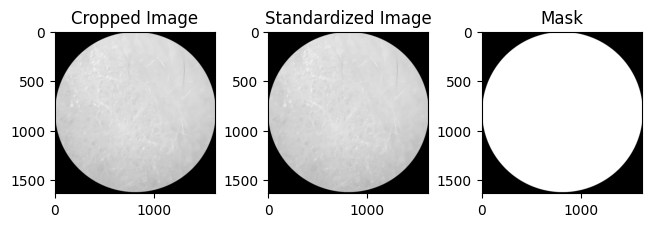

In [2]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# PyRadiomics feature extractor configuration (only first-order features)
params = {'featureClass': {'firstorder': []}}  # Limit to first-order features only
extractor = featureextractor.RadiomicsFeatureExtractor(**params)

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_10_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        print(f"Original Image Shape: {img.shape}")
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(f"Grayscale Image Shape: {img_gray.shape}")

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        print(f"Cropped Image Shape: {cropped_img.shape}")

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Standardized Image Shape: {standard_img.shape}")

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask = cropped_img > threshold_value
        mask = mask.astype(np.uint8)
        print(f"Mask Shape: {mask.shape}")

        # Step 5: Convert image and mask to SimpleITK format (required by PyRadiomics)
        sitk_image = sitk.GetImageFromArray(cropped_img)
        sitk_mask = sitk.GetImageFromArray(mask)

        # Step 6: Extract radiomic features (only first-order)
        radiomic_features = extractor.execute(sitk_image, sitk_mask)

        # Step 7: Print or save the extracted features (only first-order)
        print("First-Order Radiomic Features:")
        for feature_name, feature_value in radiomic_features.items():
            if "firstorder" in feature_name:
                print(f"{feature_name}: {feature_value}")

        # Step 8: Display the final processed image, mask, and standardized image
        fig, axs = plt.subplots(1, 3, dpi=100, constrained_layout=True)
        axs[0].imshow(cropped_img, cmap='gray')
        axs[0].set_title("Cropped Image")
        axs[1].imshow(standard_img, cmap='gray')
        axs[1].set_title("Standardized Image")
        axs[2].imshow(mask, cmap='gray')
        axs[2].set_title("Mask")
        plt.show()

        # Break to prevent processing more images (remove this to process all images)
        break


Processing file: /fsx1/encode/Image_records/iPhone_processed/45_7_iphone.jpg
Original Image Shape: (4032, 3024, 3)
Grayscale Image Shape: (4032, 3024)
Cropped Image Shape: (1617, 1616)
Standardized Image Shape: (1617, 1616)
Mask Shape: (1617, 1616)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


First-Order Radiomic Features:
original_firstorder_10Percentile: 0.7740062745098039
original_firstorder_90Percentile: 0.866256862745098
original_firstorder_Energy: 1363100.1375526777
original_firstorder_Entropy: -3.203426503814917e-16
original_firstorder_InterquartileRange: 0.04764705882352949
original_firstorder_Kurtosis: 3.7591867743159026
original_firstorder_Maximum: 1.0
original_firstorder_MeanAbsoluteDeviation: 0.02927761324799818
original_firstorder_Mean: 0.8215102462160875
original_firstorder_Median: 0.8228219607843138
original_firstorder_Minimum: 0.6127309803921568
original_firstorder_Range: 0.3872690196078432
original_firstorder_RobustMeanAbsoluteDeviation: 0.019927604719373763
original_firstorder_RootMeanSquared: 0.8223698892815265
original_firstorder_Skewness: 0.07471091733443538
original_firstorder_TotalEnergy: 1363100.1375526777
original_firstorder_Uniformity: 1.0
original_firstorder_Variance: 0.0014131501588938392


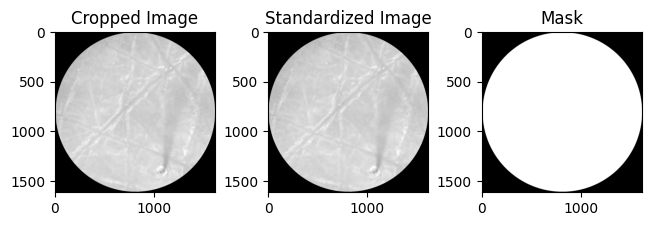

In [3]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# PyRadiomics feature extractor configuration (only first-order features)
params = {'featureClass': {'firstorder': []}}  # Limit to first-order features only
extractor = featureextractor.RadiomicsFeatureExtractor(**params)

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_7_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        print(f"Original Image Shape: {img.shape}")
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(f"Grayscale Image Shape: {img_gray.shape}")

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        print(f"Cropped Image Shape: {cropped_img.shape}")

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Standardized Image Shape: {standard_img.shape}")

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask = cropped_img > threshold_value
        mask = mask.astype(np.uint8)
        print(f"Mask Shape: {mask.shape}")

        # Step 5: Convert image and mask to SimpleITK format (required by PyRadiomics)
        sitk_image = sitk.GetImageFromArray(cropped_img)
        sitk_mask = sitk.GetImageFromArray(mask)

        # Step 6: Extract radiomic features (only first-order)
        radiomic_features = extractor.execute(sitk_image, sitk_mask)

        # Step 7: Print or save the extracted features (only first-order)
        print("First-Order Radiomic Features:")
        for feature_name, feature_value in radiomic_features.items():
            if "firstorder" in feature_name:
                print(f"{feature_name}: {feature_value}")

        # Step 8: Display the final processed image, mask, and standardized image
        fig, axs = plt.subplots(1, 3, dpi=100, constrained_layout=True)
        axs[0].imshow(cropped_img, cmap='gray')
        axs[0].set_title("Cropped Image")
        axs[1].imshow(standard_img, cmap='gray')
        axs[1].set_title("Standardized Image")
        axs[2].imshow(mask, cmap='gray')
        axs[2].set_title("Mask")
        plt.show()

        # Break to prevent processing more images (remove this to process all images)
        break


Processing file: /fsx1/encode/Image_records/iPhone_processed/76_3_iphone.jpg
Original Image Shape: (4032, 3024, 3)
Grayscale Image Shape: (4032, 3024)
Cropped Image Shape: (1570, 1570)
Standardized Image Shape: (1570, 1570)
Mask Shape: (1570, 1570)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


First-Order Radiomic Features:
original_firstorder_10Percentile: 0.6740027450980391
original_firstorder_90Percentile: 0.8551172549019608
original_firstorder_Energy: 1085707.6587094583
original_firstorder_Entropy: -3.203426503814917e-16
original_firstorder_InterquartileRange: 0.09084392156862742
original_firstorder_Kurtosis: 3.6269952885622563
original_firstorder_Maximum: 1.0
original_firstorder_MeanAbsoluteDeviation: 0.05677453855481967
original_firstorder_Mean: 0.7550840365683656
original_firstorder_Median: 0.743504705882353
original_firstorder_Minimum: 0.3684094117647059
original_firstorder_Range: 0.6315905882352941
original_firstorder_RobustMeanAbsoluteDeviation: 0.03841999229514751
original_firstorder_RootMeanSquared: 0.758562029808104
original_firstorder_Skewness: 0.72191491374551
original_firstorder_TotalEnergy: 1085707.6587094583
original_firstorder_Uniformity: 1.0
original_firstorder_Variance: 0.005264450786213416


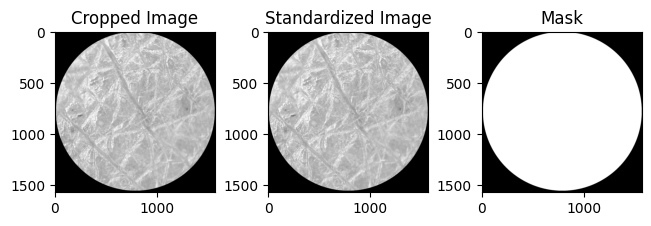

In [4]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# PyRadiomics feature extractor configuration (only first-order features)
params = {'featureClass': {'firstorder': []}}  # Limit to first-order features only
extractor = featureextractor.RadiomicsFeatureExtractor(**params)

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_3_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        print(f"Original Image Shape: {img.shape}")
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(f"Grayscale Image Shape: {img_gray.shape}")

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        print(f"Cropped Image Shape: {cropped_img.shape}")

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Standardized Image Shape: {standard_img.shape}")

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask = cropped_img > threshold_value
        mask = mask.astype(np.uint8)
        print(f"Mask Shape: {mask.shape}")

        # Step 5: Convert image and mask to SimpleITK format (required by PyRadiomics)
        sitk_image = sitk.GetImageFromArray(cropped_img)
        sitk_mask = sitk.GetImageFromArray(mask)

        # Step 6: Extract radiomic features (only first-order)
        radiomic_features = extractor.execute(sitk_image, sitk_mask)

        # Step 7: Print or save the extracted features (only first-order)
        print("First-Order Radiomic Features:")
        for feature_name, feature_value in radiomic_features.items():
            if "firstorder" in feature_name:
                print(f"{feature_name}: {feature_value}")

        # Step 8: Display the final processed image, mask, and standardized image
        fig, axs = plt.subplots(1, 3, dpi=100, constrained_layout=True)
        axs[0].imshow(cropped_img, cmap='gray')
        axs[0].set_title("Cropped Image")
        axs[1].imshow(standard_img, cmap='gray')
        axs[1].set_title("Standardized Image")
        axs[2].imshow(mask, cmap='gray')
        axs[2].set_title("Mask")
        plt.show()

        # Break to prevent processing more images (remove this to process all images)
        break


Processing file: /fsx1/encode/Image_records/iPhone_processed/56_12_iphone.jpg
Original Image Shape: (4032, 3024, 3)
Grayscale Image Shape: (4032, 3024)
Cropped Image Shape: (1600, 1586)
Standardized Image Shape: (1600, 1586)
Mask Shape: (1600, 1586)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


First-Order Radiomic Features:
original_firstorder_10Percentile: 0.7381835294117647
original_firstorder_90Percentile: 0.8682211764705883
original_firstorder_Energy: 1254864.135064678
original_firstorder_Entropy: -3.203426503814917e-16
original_firstorder_InterquartileRange: 0.06927882352941173
original_firstorder_Kurtosis: 2.9154408577485844
original_firstorder_Maximum: 0.9949701960784314
original_firstorder_MeanAbsoluteDeviation: 0.040622851660727606
original_firstorder_Mean: 0.8004713641097106
original_firstorder_Median: 0.7973729411764706
original_firstorder_Minimum: 0.607304705882353
original_firstorder_Range: 0.38766549019607843
original_firstorder_RobustMeanAbsoluteDeviation: 0.028787467602328507
original_firstorder_RootMeanSquared: 0.8020676777712972
original_firstorder_Skewness: 0.2791493997084787
original_firstorder_TotalEnergy: 1254864.135064678
original_firstorder_Uniformity: 1.0
original_firstorder_Variance: 0.0025581549657804964


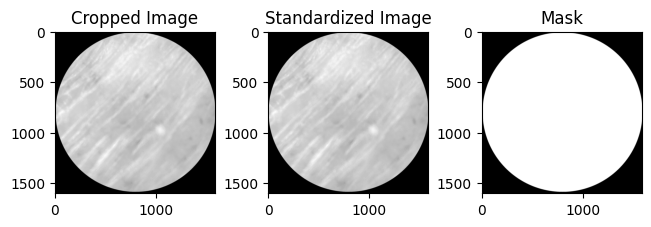

In [5]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# PyRadiomics feature extractor configuration (only first-order features)
params = {'featureClass': {'firstorder': []}}  # Limit to first-order features only
extractor = featureextractor.RadiomicsFeatureExtractor(**params)

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_12_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        print(f"Original Image Shape: {img.shape}")
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(f"Grayscale Image Shape: {img_gray.shape}")

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        print(f"Cropped Image Shape: {cropped_img.shape}")

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Standardized Image Shape: {standard_img.shape}")

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask = cropped_img > threshold_value
        mask = mask.astype(np.uint8)
        print(f"Mask Shape: {mask.shape}")

        # Step 5: Convert image and mask to SimpleITK format (required by PyRadiomics)
        sitk_image = sitk.GetImageFromArray(cropped_img)
        sitk_mask = sitk.GetImageFromArray(mask)

        # Step 6: Extract radiomic features (only first-order)
        radiomic_features = extractor.execute(sitk_image, sitk_mask)

        # Step 7: Print or save the extracted features (only first-order)
        print("First-Order Radiomic Features:")
        for feature_name, feature_value in radiomic_features.items():
            if "firstorder" in feature_name:
                print(f"{feature_name}: {feature_value}")

        # Step 8: Display the final processed image, mask, and standardized image
        fig, axs = plt.subplots(1, 3, dpi=100, constrained_layout=True)
        axs[0].imshow(cropped_img, cmap='gray')
        axs[0].set_title("Cropped Image")
        axs[1].imshow(standard_img, cmap='gray')
        axs[1].set_title("Standardized Image")
        axs[2].imshow(mask, cmap='gray')
        axs[2].set_title("Mask")
        plt.show()

        # Break to prevent processing more images (remove this to process all images)
        break


Processing file: /fsx1/encode/Image_records/iPhone_processed/56_12_iphone.jpg
Original Image Shape: (4032, 3024, 3)
Grayscale Image Shape: (4032, 3024)
Cropped Image Shape: (1600, 1586)
Standardized Image Shape: (1600, 1586)
Mask Shape: (1600, 1586)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


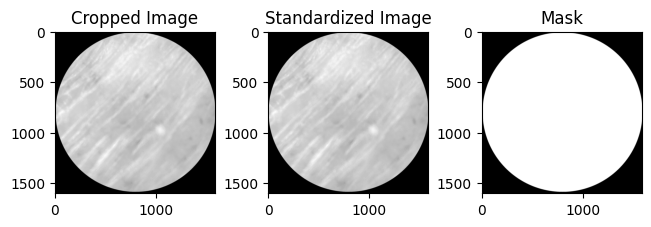

Radiomic features saved to radiomic_features_12_class.csv


In [6]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pandas as pd  # For saving to CSV

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# PyRadiomics feature extractor configuration (only first-order features)
params = {'featureClass': {'firstorder': []}}  # Limit to first-order features only
extractor = featureextractor.RadiomicsFeatureExtractor(**params)

# Prepare a list to collect feature data for all images
feature_data = []

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_12_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        print(f"Original Image Shape: {img.shape}")
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(f"Grayscale Image Shape: {img_gray.shape}")

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        print(f"Cropped Image Shape: {cropped_img.shape}")

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Standardized Image Shape: {standard_img.shape}")

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask = cropped_img > threshold_value
        mask = mask.astype(np.uint8)
        print(f"Mask Shape: {mask.shape}")

        # Step 5: Convert image and mask to SimpleITK format (required by PyRadiomics)
        sitk_image = sitk.GetImageFromArray(cropped_img)
        sitk_mask = sitk.GetImageFromArray(mask)

        # Step 6: Extract radiomic features (only first-order)
        radiomic_features = extractor.execute(sitk_image, sitk_mask)

        # Step 7: Collect first-order features into a dictionary
        feature_row = {"Image": img_file}
        for feature_name, feature_value in radiomic_features.items():
            if "firstorder" in feature_name:
                feature_row[feature_name] = feature_value

        # Append the feature row to the list
        feature_data.append(feature_row)

        # Step 8: Optionally display the images (cropped, standardized, and mask)
        fig, axs = plt.subplots(1, 3, dpi=100, constrained_layout=True)
        axs[0].imshow(cropped_img, cmap='gray')
        axs[0].set_title("Cropped Image")
        axs[1].imshow(standard_img, cmap='gray')
        axs[1].set_title("Standardized Image")
        axs[2].imshow(mask, cmap='gray')
        axs[2].set_title("Mask")
        plt.show()

        # Break to prevent processing more images (remove this to process all images)
        break

# Step 9: Save the collected features to a CSV file
df = pd.DataFrame(feature_data)
output_csv = "radiomic_features_12_class.csv"
df.to_csv(output_csv, index=False)
print(f"Radiomic features saved to {output_csv}")


Processing file: /fsx1/encode/Image_records/iPhone_processed/56_12_iphone.jpg
Original Image Shape: (4032, 3024, 3)
Grayscale Image Shape: (4032, 3024)
Cropped Image Shape: (1600, 1586)
Standardized Image Shape: (1600, 1586)
Mask Shape: (1600, 1586)
SimpleITK Image Shape: (1586, 1600)
SimpleITK Mask Shape: (1586, 1600)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


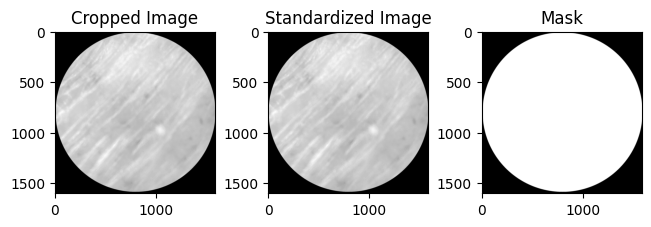

In [9]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pandas as pd  # For saving to CSV

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# PyRadiomics feature extractor configuration (only first-order features)
params = {'featureClass': {'firstorder': []}}  # Limit to first-order features only
extractor = featureextractor.RadiomicsFeatureExtractor(**params)

# Prepare a list to collect feature data for all images
feature_data = []

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_12_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        print(f"Original Image Shape: {img.shape}")
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(f"Grayscale Image Shape: {img_gray.shape}")

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        print(f"Cropped Image Shape: {cropped_img.shape}")

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Standardized Image Shape: {standard_img.shape}")

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask = cropped_img > threshold_value
        mask = mask.astype(np.uint8)
        print(f"Mask Shape: {mask.shape}")

        # Step 5: Convert image and mask to SimpleITK format (required by PyRadiomics)
        sitk_image = sitk.GetImageFromArray(cropped_img)
        sitk_mask = sitk.GetImageFromArray(mask)

        # Print the shape (size) of the SimpleITK image and mask
        print(f"SimpleITK Image Shape: {sitk_image.GetSize()}")
        print(f"SimpleITK Mask Shape: {sitk_mask.GetSize()}")

        # Step 6: Extract radiomic features (only first-order)
        radiomic_features = extractor.execute(sitk_image, sitk_mask)

        # Step 7: Collect first-order features into a dictionary
        feature_row = {"Image": img_file}
        for feature_name, feature_value in radiomic_features.items():
            if "firstorder" in feature_name:
                feature_row[feature_name] = feature_value

        # Append the feature row to the list
        feature_data.append(feature_row)

        # Step 8: Optionally display the images (cropped, standardized, and mask)
        fig, axs = plt.subplots(1, 3, dpi=100, constrained_layout=True)
        axs[0].imshow(cropped_img, cmap='gray')
        axs[0].set_title("Cropped Image")
        axs[1].imshow(standard_img, cmap='gray')
        axs[1].set_title("Standardized Image")
        axs[2].imshow(mask, cmap='gray')
        axs[2].set_title("Mask")
        plt.show()

        # Break to prevent processing more images (remove this to process all images)
        break

# # Step 9: Save the collected features to a CSV file
# df = pd.DataFrame(feature_data)
# output_csv = "radiomic_features_12_class.csv"
# df.to_csv(output_csv, index=False)
# print(f"Radiomic features saved to {output_csv}")


Processing file: /fsx1/encode/Image_records/iPhone_processed/2_10_iphone.jpg
Original Image Shape: (4032, 3024, 3)
Grayscale Image Shape: (4032, 3024)
Cropped Image Shape: (1632, 1617)
Standardized Image Shape: (1632, 1617)
Mask Shape: (1632, 1617)
SimpleITK Image Shape: (1617, 1632)
SimpleITK Mask Shape: (1617, 1632)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


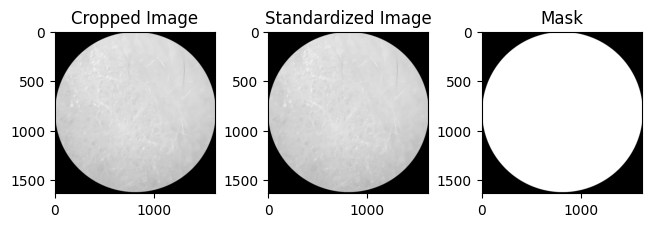

In [10]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pandas as pd  # For saving to CSV

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# PyRadiomics feature extractor configuration (only first-order features)
params = {'featureClass': {'firstorder': []}}  # Limit to first-order features only
extractor = featureextractor.RadiomicsFeatureExtractor(**params)

# Prepare a list to collect feature data for all images
feature_data = []

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_10_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        print(f"Original Image Shape: {img.shape}")
        
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(f"Grayscale Image Shape: {img_gray.shape}")

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        print(f"Cropped Image Shape: {cropped_img.shape}")

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Standardized Image Shape: {standard_img.shape}")

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask = cropped_img > threshold_value
        mask = mask.astype(np.uint8)
        print(f"Mask Shape: {mask.shape}")

        # Step 5: Convert image and mask to SimpleITK format (required by PyRadiomics)
        sitk_image = sitk.GetImageFromArray(cropped_img)
        sitk_mask = sitk.GetImageFromArray(mask)

        # Print the shape (size) of the SimpleITK image and mask
        print(f"SimpleITK Image Shape: {sitk_image.GetSize()}")
        print(f"SimpleITK Mask Shape: {sitk_mask.GetSize()}")

        # Step 6: Extract radiomic features (only first-order)
        radiomic_features = extractor.execute(sitk_image, sitk_mask)

        # Step 7: Collect first-order features into a dictionary
        feature_row = {"Image": img_file}
        for feature_name, feature_value in radiomic_features.items():
            if "firstorder" in feature_name:
                feature_row[feature_name] = feature_value

        # Append the feature row to the list
        feature_data.append(feature_row)

        # Step 8: Optionally display the images (cropped, standardized, and mask)
        fig, axs = plt.subplots(1, 3, dpi=100, constrained_layout=True)
        axs[0].imshow(cropped_img, cmap='gray')
        axs[0].set_title("Cropped Image")
        axs[1].imshow(standard_img, cmap='gray')
        axs[1].set_title("Standardized Image")
        axs[2].imshow(mask, cmap='gray')
        axs[2].set_title("Mask")
        plt.show()

        # Break to prevent processing more images (remove this to process all images)
        break

# # Step 9: Save the collected features to a CSV file
# df = pd.DataFrame(feature_data)
# output_csv = "radiomic_features_12_class.csv"
# df.to_csv(output_csv, index=False)
# print(f"Radiomic features saved to {output_csv}")


In [7]:
import pandas as pd
df=pd.read_csv("radiomic_features_12_class.csv")

In [8]:
df

Image  \
0  /fsx1/encode/Image_records/iPhone_processed/56...   

   original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                          0.738184                          0.868221   

   original_firstorder_Energy  original_firstorder_Entropy  \
0                1.254864e+06                -3.203427e-16   

   original_firstorder_InterquartileRange  original_firstorder_Kurtosis  \
0                                0.069279                      2.915441   

   original_firstorder_Maximum  original_firstorder_MeanAbsoluteDeviation  \
0                      0.99497                                   0.040623   

   original_firstorder_Mean  original_firstorder_Median  \
0                  0.800471                    0.797373   

   original_firstorder_Minimum  original_firstorder_Range  \
0                     0.607305                   0.387665   

   original_firstorder_RobustMeanAbsoluteDeviation  \
0                                         0.028787   

   original_firstorder_RootMeanSquared  original_firstorder_Skewness  \
0                             0.802068                      0.279149   

   original_firstorder_TotalEnergy  original_firstorder_Uniformity  \
0                     1.254864e+06                             1.0   

   original_firstorder_Variance  
0                      0.002558

/fsx1/encode/Image_records/iPhone_processed/76_3_iphone.jpg
<class 'numpy.ndarray'>
(4032, 3024)
1.0
0.0
Processed Image: (mean=0.58, std=0.33)
Standardized Image: (mean=0.00, std=1.00)
76_3_iphone.jpg


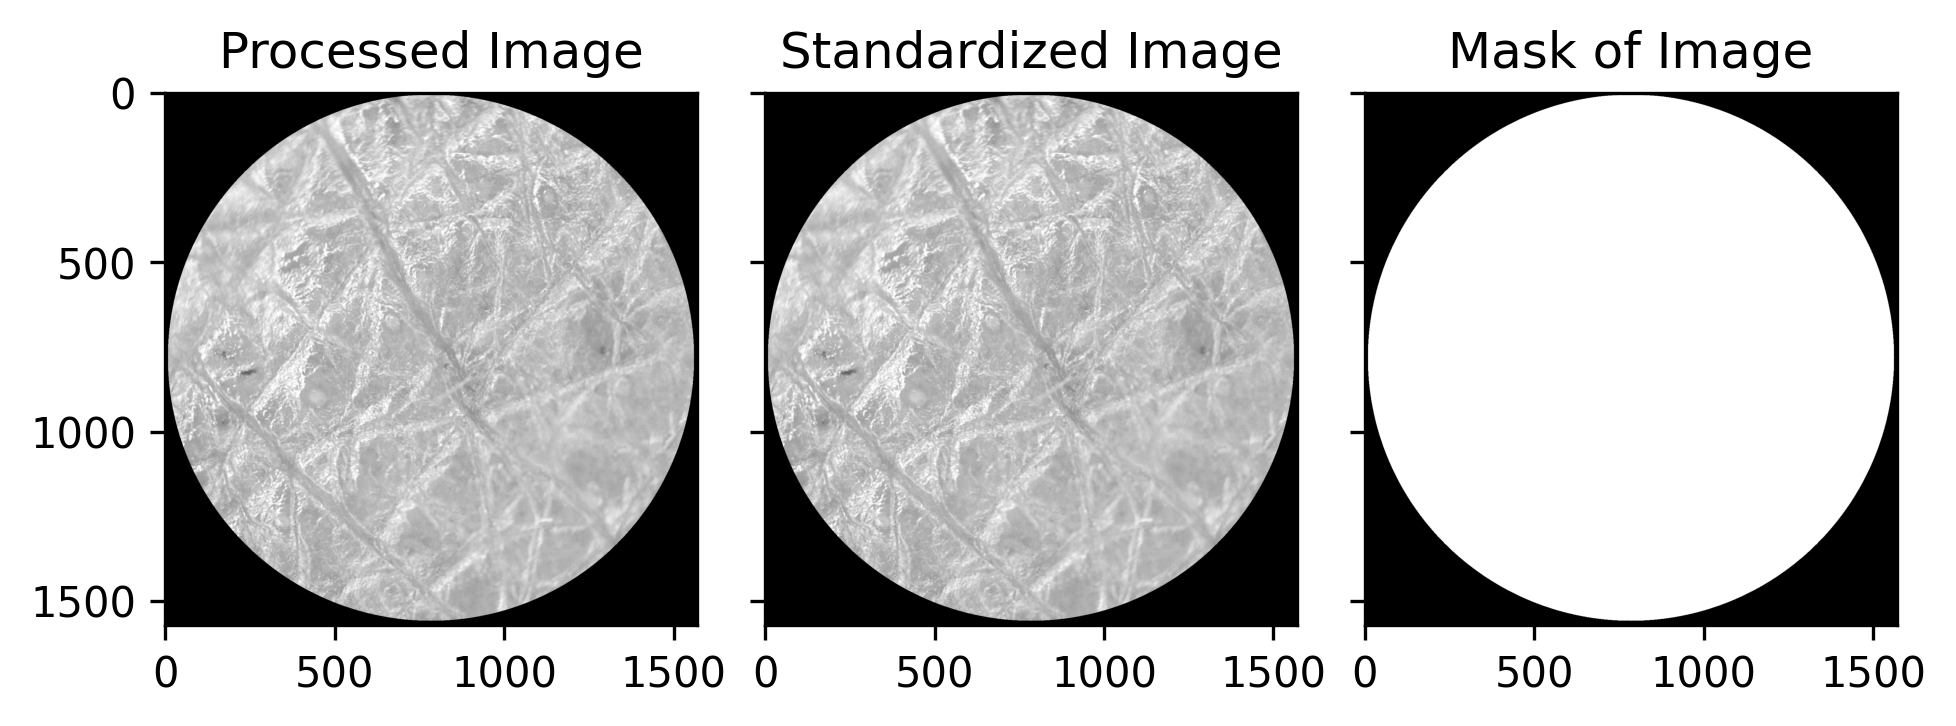

NameError: name 'parameter_path' is not defined

In [11]:
#3: palm left dorsal
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_3_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(img_file)
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)
        print(type(img_gray)) ##type of image##
        print(img_gray.shape) ##image shape##
        print(np.max(np.unique(img_gray))) ##check max intensity values##
        print(np.min(np.unique(img_gray))) ##check min intensity values##
        if (np.isnan(img_gray)==True).any(): ##no nan values##
            print("found")
        ###cropping image
        # Step 1: Find non-zero (or non-background) pixels
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        # Step 2: Determine the bounding box of non-background area
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        # Step 3: Crop the image to this bounding box
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]
        ###normalization
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std
        print(f"Processed Image: (mean={cropped_img.mean():.2f}, std={cropped_img.std():.2f})")
        print(f"Standardized Image: (mean={standard_img.mean():.2f}, std={standard_img.std():.2f})")
        threshold_value = 0.1  # You can adjust this value based on your needs
        # Step 2: Create the mask
        mask_arr = cropped_img > threshold_value  # Pixels greater than the threshold become True
        # Step 3: Convert the boolean mask to an integer mask (optional)
        mask_arr = mask_arr.astype(np.uint8)  # Convert boolean to 0 and 1 (optional)
        study_path = img_file.split('/')
        print(study_path[5])
        # Display the mask
        #plt.imshow(mask, cmap='gray')
        #plt.show()
        fig, axs = plt.subplots(1, 3, dpi=300, constrained_layout=True, sharey=True)
        axs[0].imshow(cropped_img, 'gray')
        axs[1].imshow(standard_img, 'gray')
        axs[2].imshow(mask_arr, 'gray')
        axs[0].set_title("Processed Image")
        axs[1].set_title("Standardized Image")
        axs[2].set_title("Mask of Image")
        plt.show()
        # Convert the image and mask NumPy arrays to SimpleITK images
        image = sitk.GetImageFromArray(cropped_img)
        mask = sitk.GetImageFromArray(mask_arr)
                # Create the PyRadiomics feature extractor
        extractor = featureextractor.RadiomicsFeatureExtractor(parameter_path)
                # Enable or disable the features you want to calculate
        extractor.disableAllFeatures()
        extractor.enableFeatureClassByName('firstorder')
        extractor.settings['binCount'] = 20
        extractor.settings['distances'] = [1]
                # Calculate the features using the image and mask
        result = extractor.execute(image, mask)
        feature = []
        value = []
                # Access the calculated features
        for feature_name in result.keys():
            print(f"{feature_name}: {result[feature_name]}")
            feature.append(feature_name)
            value.append(result[feature_name])
        df = pd.DataFrame(feature, columns=['Feature'])
        df['Value']=value
        df.to_csv(study_path[5] + '_' + 'img3_features.csv')


In [14]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import pandas as pd  # For saving to CSV
import matplotlib.pyplot as plt

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"
file = "/fsx1/encode/Image_records/iPhone_processed"

# Path to save the extracted features
path_save = "/fsx1/encode/Image_records/iPhone_processed/radiomics" 
if not os.path.isdir(path_save):
    os.mkdir(path_save)

# PyRadiomics parameters file
parameter_path = "./Pyradiomics_Params.yaml"

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_3_android.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask_arr = cropped_img > threshold_value
        mask_arr = mask_arr.astype(np.uint8)

        # Extract study ID from the file path for naming the CSV file
        study_path = img_file.split('/')
        study_id = study_path[5]

        # Convert the image and mask NumPy arrays to SimpleITK images
        image = sitk.GetImageFromArray(cropped_img)
        mask = sitk.GetImageFromArray(mask_arr)

        # Create the PyRadiomics feature extractor with the specified parameters
        extractor = featureextractor.RadiomicsFeatureExtractor(parameter_path)

        # Enable only first-order features
        extractor.disableAllFeatures()
        extractor.enableFeatureClassByName('firstorder')
        extractor.settings['binCount'] = 20
        extractor.settings['distances'] = [1]

        # Calculate the features using the image and mask
        result = extractor.execute(image, mask)

        # Collect features and values for the CSV
        feature_list = []
        value_list = []
        for feature_name in result.keys():
            if "firstorder" in feature_name:  # Collect only first-order features
                feature_list.append(feature_name)
                value_list.append(result[feature_name])

        # Save the features to a CSV file in the specified directory
        df = pd.DataFrame({'Feature': feature_list, 'Value': value_list})
        csv_filename = os.path.join(path_save, f"{study_id}_img_features.csv")
        df.to_csv(csv_filename, index=False)
        print(f"Features saved to {csv_filename}")

        # Break to prevent processing more images (remove this to process all images)
        # break


PermissionError: [Errno 13] Permission denied: '/fsx1/encode/Image_records/iPhone_processed/radiomics'

In [15]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import pandas as pd  # For saving to CSV
import matplotlib.pyplot as plt

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_3_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask_arr = cropped_img > threshold_value
        mask_arr = mask_arr.astype(np.uint8)

        # Extract study ID from the file path for naming the CSV file
        study_path = img_file.split('/')
        study_id = study_path[5]

        # Convert the image and mask NumPy arrays to SimpleITK images
        image = sitk.GetImageFromArray(cropped_img)
        mask = sitk.GetImageFromArray(mask_arr)

        # Create the PyRadiomics feature extractor with default settings
        extractor = featureextractor.RadiomicsFeatureExtractor()

        # Enable only first-order features
        extractor.disableAllFeatures()
        extractor.enableFeatureClassByName('firstorder')
        extractor.settings['binCount'] = 20
        extractor.settings['distances'] = [1]

        # Calculate the features using the image and mask
        result = extractor.execute(image, mask)

        # Collect features and values for the CSV
        feature_list = []
        value_list = []
        for feature_name in result.keys():
            if "firstorder" in feature_name:  # Collect only first-order features
                feature_list.append(feature_name)
                value_list.append(result[feature_name])

        # Save the features to a CSV file
        df = pd.DataFrame({'Feature': feature_list, 'Value': value_list})
        csv_filename = f"{study_id}_img3_features.csv"
        df.to_csv(csv_filename, index=False)
        print(f"Features saved to {csv_filename}")

        # Break to prevent processing more images (remove this to process all images)
        # break


Processing file: /fsx1/encode/Image_records/iPhone_processed/76_3_iphone.jpg
Features saved to 76_3_iphone.jpg_img3_features.csv
Processing file: /fsx1/encode/Image_records/iPhone_processed/25_3_iphone.jpg
Features saved to 25_3_iphone.jpg_img3_features.csv
Processing file: /fsx1/encode/Image_records/iPhone_processed/124_3_iphone.jpg
Features saved to 124_3_iphone.jpg_img3_features.csv
Processing file: /fsx1/encode/Image_records/iPhone_processed/83_3_iphone.jpg
Features saved to 83_3_iphone.jpg_img3_features.csv
Processing file: /fsx1/encode/Image_records/iPhone_processed/82_3_iphone.jpg
Features saved to 82_3_iphone.jpg_img3_features.csv
Processing file: /fsx1/encode/Image_records/iPhone_processed/77_3_iphone.jpg
Features saved to 77_3_iphone.jpg_img3_features.csv
Processing file: /fsx1/encode/Image_records/iPhone_processed/125_3_iphone.jpg
Features saved to 125_3_iphone.jpg_img3_features.csv
Processing file: /fsx1/encode/Image_records/iPhone_processed/24_3_iphone.jpg
Features saved t

In [2]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import pandas as pd  # For saving to CSV
import matplotlib.pyplot as plt

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# Prepare a list to accumulate data for all images
all_data = []

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_3_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask_arr = cropped_img > threshold_value
        mask_arr = mask_arr.astype(np.uint8)

        # Extract study ID from the file path for naming the CSV file
        study_path = img_file.split('/')
        study_id = study_path[5]

        # Convert the image and mask NumPy arrays to SimpleITK images
        image = sitk.GetImageFromArray(cropped_img)
        mask = sitk.GetImageFromArray(mask_arr)

        # Create the PyRadiomics feature extractor with default settings
        extractor = featureextractor.RadiomicsFeatureExtractor()

        # Enable only first-order features
        extractor.disableAllFeatures()
        extractor.enableFeatureClassByName('firstorder')
        extractor.settings['binCount'] = 20
        extractor.settings['distances'] = [1]

        # Calculate the features using the image and mask
        result = extractor.execute(image, mask)

        # Prepare a dictionary to store the features for the current image
        feature_dict = {"Image": img_file}

        # Collect only first-order features and add them to the dictionary
        for feature_name in result.keys():
            if "firstorder" in feature_name:
                feature_dict[feature_name] = result[feature_name]

        # Append the feature data to the all_data list
        all_data.append(feature_dict)

# Step 5: Convert the accumulated data to a DataFrame and save it to CSV
df = pd.DataFrame(all_data)
output_csv = "all_images_features.csv"
df.to_csv(output_csv, index=False)
print(f"All features saved to {output_csv}")


Processing file: /fsx1/encode/Image_records/iPhone_processed/76_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/25_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/124_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/83_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/82_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/77_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/125_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/24_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/80_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/26_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/127_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/75_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/126_3_iphone

In [2]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Load your dataset
df = pd.read_csv('all_images_features.csv')

# Drop non-numeric columns (e.g., 'Image') and define features (X)
X = df.drop(columns=['Image'])  # Replace 'Image' with any other non-numeric columns you may have

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for VIF computation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Print the VIF values
print(vif_data)


                                            Feature           VIF
0                  original_firstorder_10Percentile  2.198101e+03
1                  original_firstorder_90Percentile  1.954377e+02
2                        original_firstorder_Energy           inf
3                       original_firstorder_Entropy  2.229939e+02
4            original_firstorder_InterquartileRange  2.515503e+03
5                      original_firstorder_Kurtosis  5.246768e+00
6                       original_firstorder_Maximum           inf
7         original_firstorder_MeanAbsoluteDeviation  2.916484e+03
8                          original_firstorder_Mean  1.077716e+06
9                        original_firstorder_Median  3.147932e+03
10                      original_firstorder_Minimum           inf
11                        original_firstorder_Range           inf
12  original_firstorder_RobustMeanAbsoluteDeviation  5.028302e+03
13              original_firstorder_RootMeanSquared  9.708315e+05
14        

/home/jupyter-sadia/.local/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [4]:
pip install statsmodels 

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 91.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import pandas as pd  # For saving to CSV
import matplotlib.pyplot as plt

# Directory path containing the images
file = "encode/Image_records/Android_processed"

# Prepare a list to accumulate data for all images
all_data = []

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    img_files = os.path.join(dirpath, "*_3_iphone.jpg")
    for img_file in glob.glob(img_files):
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask_arr = cropped_img > threshold_value
        mask_arr = mask_arr.astype(np.uint8)

        # Extract study ID from the file path for naming the CSV file
        study_path = img_file.split('/')
        study_id = study_path[5]

        # Convert the image and mask NumPy arrays to SimpleITK images
        image = sitk.GetImageFromArray(cropped_img)
        mask = sitk.GetImageFromArray(mask_arr)

        # Create the PyRadiomics feature extractor with default settings
        extractor = featureextractor.RadiomicsFeatureExtractor()

        # Enable only first-order features
        extractor.disableAllFeatures()
        extractor.enableFeatureClassByName('firstorder')
        extractor.settings['binCount'] = 20
        extractor.settings['distances'] = [1]

        # Calculate the features using the image and mask
        result = extractor.execute(image, mask)

        # Prepare a dictionary to store the features for the current image
        feature_dict = {"Image": img_file}

        # Collect only first-order features and add them to the dictionary
        for feature_name in result.keys():
            if "firstorder" in feature_name:
                feature_dict[feature_name] = result[feature_name]

        # Append the feature data to the all_data list
        all_data.append(feature_dict)

# Step 5: Convert the accumulated data to a DataFrame and save it to CSV
df = pd.DataFrame(all_data)
output_csv = "all_images_features.csv"
df.to_csv(output_csv, index=False)
print(f"All features saved to {output_csv}")


In [7]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import pandas as pd  # For saving to CSV
import matplotlib.pyplot as plt

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# Prepare a list to accumulate data for all images
all_data = []

# Iterate over the files in the directory
for (dirpath, dirnames, filenames) in os.walk(file):
    # Adjust the pattern to include image types 3, 7, 10, 12
    img_files = os.path.join(dirpath, "*_{3,7,10,12}_iphone.jpg")  # Use braces for multiple patterns

    for img_file in glob.glob(img_files, recursive=True):  # recursive=True ensures all matching files are captured
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask_arr = cropped_img > threshold_value
        mask_arr = mask_arr.astype(np.uint8)

        # Extract study ID from the file path for naming the CSV file
        study_path = img_file.split('/')
        study_id = study_path[5]

        # Convert the image and mask NumPy arrays to SimpleITK images
        image = sitk.GetImageFromArray(cropped_img)
        mask = sitk.GetImageFromArray(mask_arr)

        # Create the PyRadiomics feature extractor with default settings
        extractor = featureextractor.RadiomicsFeatureExtractor()

        # Enable only first-order features
        extractor.disableAllFeatures()
        extractor.enableFeatureClassByName('firstorder')
        extractor.settings['binCount'] = 20
        extractor.settings['distances'] = [1]

        # Calculate the features using the image and mask
        result = extractor.execute(image, mask)

        # Prepare a dictionary to store the features for the current image
        feature_dict = {"Image": img_file}

        # Collect only first-order features and add them to the dictionary
        for feature_name in result.keys():
            if "firstorder" in feature_name:
                feature_dict[feature_name] = result[feature_name]

        # Append the feature data to the all_data list
        all_data.append(feature_dict)

# Step 5: Convert the accumulated data to a DataFrame and save it to CSV
df = pd.DataFrame(all_data)
output_csv = "all_images_features.csv"
df.to_csv(output_csv, index=False)
print(f"All features saved to {output_csv}")


All features saved to all_images_features.csv


In [1]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import pandas as pd  # For saving to CSV
import matplotlib.pyplot as plt

# Directory path containing the images
file = "/fsx1/encode/Image_records/iPhone_processed"

# Prepare a list to accumulate data for all images
all_data = []

# Patterns for image types 3, 7, 10, 12
patterns = ["*_3_iphone.jpg", "*_7_iphone.jpg", "*_10_iphone.jpg", "*_12_iphone.jpg"]

# Iterate over the files in the directory for each pattern
for pattern in patterns:
    img_files = os.path.join(file, pattern)

    for img_file in glob.glob(img_files):  # No need for recursive=True here
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask_arr = cropped_img > threshold_value
        mask_arr = mask_arr.astype(np.uint8)

        # Extract study ID from the file path for naming the CSV file
        study_path = img_file.split('/')
        study_id = study_path[-1]  # Use the last element for the filename

        # Convert the image and mask NumPy arrays to SimpleITK images
        image = sitk.GetImageFromArray(cropped_img)
        mask = sitk.GetImageFromArray(mask_arr)

        # Create the PyRadiomics feature extractor with default settings
        extractor = featureextractor.RadiomicsFeatureExtractor()

        # Enable only first-order features
        extractor.disableAllFeatures()
        extractor.enableFeatureClassByName('firstorder')
        extractor.settings['binCount'] = 20
        extractor.settings['distances'] = [1]

        # Calculate the features using the image and mask
        result = extractor.execute(image, mask)

        # Prepare a dictionary to store the features for the current image
        feature_dict = {"Image": img_file}

        # Collect only first-order features and add them to the dictionary
        for feature_name in result.keys():
            if "firstorder" in feature_name:
                feature_dict[feature_name] = result[feature_name]

        # Append the feature data to the all_data list
        all_data.append(feature_dict)

# Step 5: Convert the accumulated data to a DataFrame and save it to CSV
df = pd.DataFrame(all_data)
output_csv = "all_images_features.csv"
df.to_csv(output_csv, index=False)
print(f"All features saved to {output_csv}")


Processing file: /fsx1/encode/Image_records/iPhone_processed/76_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/25_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/124_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/83_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/82_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/77_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/125_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/24_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/80_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/26_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/127_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/75_3_iphone.jpg
Processing file: /fsx1/encode/Image_records/iPhone_processed/126_3_iphone

In [2]:
import os
import glob
import cv2
import numpy as np
from skimage.color import rgb2gray
import radiomics
from radiomics import featureextractor  # This imports the feature extractor
import SimpleITK as sitk
import pandas as pd  # For saving to CSV
import matplotlib.pyplot as plt

# Directory path containing the images
file = "/fsx1/encode/Image_records/Android_processed"

# Prepare a list to accumulate data for all images
all_data = []

# Patterns for image types 3, 7, 10, 12
patterns = ["*_3_android.jpg", "*_7_android.jpg", "*_10_android.jpg", "*_12_android.jpg"]

# Iterate over the files in the directory for each pattern
for pattern in patterns:
    img_files = os.path.join(file, pattern)

    for img_file in glob.glob(img_files):  # No need for recursive=True here
        print(f"Processing file: {img_file}")

        # Step 1: Read the image using OpenCV and convert it to grayscale
        img = cv2.imread(img_file)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_gray = rgb2gray(img_rgb)

        # Step 2: Crop the image (assuming this is your ROI extraction process)
        non_zero_rows = np.any(img_gray != 0, axis=1)
        non_zero_cols = np.any(img_gray != 0, axis=0)
        row_min, row_max = np.where(non_zero_rows)[0][[0, -1]]
        col_min, col_max = np.where(non_zero_cols)[0][[0, -1]]
        cropped_img = img_gray[row_min:row_max+1, col_min:col_max+1]

        # Step 3: Normalize the cropped image
        img_mean = cropped_img.mean()
        img_std = cropped_img.std()
        standard_img = (cropped_img - img_mean) / img_std

        # Step 4: Create a mask using the threshold value
        threshold_value = 0.1  # Adjust this as needed
        mask_arr = cropped_img > threshold_value
        mask_arr = mask_arr.astype(np.uint8)

        # Extract study ID from the file path for naming the CSV file
        study_path = img_file.split('/')
        study_id = study_path[-1]  # Use the last element for the filename

        # Convert the image and mask NumPy arrays to SimpleITK images
        image = sitk.GetImageFromArray(cropped_img)
        mask = sitk.GetImageFromArray(mask_arr)

        # Create the PyRadiomics feature extractor with default settings
        extractor = featureextractor.RadiomicsFeatureExtractor()

        # Enable only first-order features
        extractor.disableAllFeatures()
        extractor.enableFeatureClassByName('firstorder')
        extractor.settings['binCount'] = 20
        extractor.settings['distances'] = [1]

        # Calculate the features using the image and mask
        result = extractor.execute(image, mask)

        # Prepare a dictionary to store the features for the current image
        feature_dict = {"Image": img_file}

        # Collect only first-order features and add them to the dictionary
        for feature_name in result.keys():
            if "firstorder" in feature_name:
                feature_dict[feature_name] = result[feature_name]

        # Append the feature data to the all_data list
        all_data.append(feature_dict)

# Step 5: Convert the accumulated data to a DataFrame and save it to CSV
df = pd.DataFrame(all_data)
output_csv = "all_images_features_android.csv"
df.to_csv(output_csv, index=False)
print(f"All features saved to {output_csv}")


Processing file: /fsx1/encode/Image_records/Android_processed/120_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/108_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/12_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/67_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/99_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/125_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/17_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/119_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/62_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/9_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/76_3_android.jpg
Processing file: /fsx1/encode/Image_records/Android_processed/88_3_android.jpg
Processing file: /fsx1/encode/Image_records/Andro

In [3]:
import pandas as pd

# Sample data or read from your CSV
df = pd.read_csv('df_w_imagetime.csv')  # replace with your actual file name

# Dictionary mapping location names to numbers
location_mapping = {
    "PALM_LEFT_DORSAL": 3,
    "PALM_RIGHT_DORSAL": 7,
    "EARLOBE_OUTER": 9,
    "EARLOBE_INNER": 10,
    # Add the rest of your location mappings here
}

# Replace spaces and special characters in 'Location' to match the keys in the dictionary
df['Location_clean'] = df['Location'].str.replace(' ', '_').str.upper()

# Create the 'Location Number' column by mapping the cleaned 'Location' values
df['Location Number'] = df['Location_clean'].map(location_mapping).fillna(0)

# Drop the 'Location_clean' column as it's no longer needed
df.drop(columns=['Location_clean'], inplace=True)

# Convert the 'Location Number' to integer type, as the default is float after mapping
df['Location Number'] = df['Location Number'].astype(int)

# Save the updated dataframe to a new CSV
df.to_csv('updated_file_with_location_numbers.csv', index=False)

print("Location numbers added successfully with unmapped locations set to 0!")


Location numbers added successfully with unmapped locations set to 0!


In [4]:
import pandas as pd

# Assuming df is your DataFrame loaded from the previous file
# Example DataFrame

# Create DataFrame from the provided data
df = pd.read_csv("all_images_features.csv")

# Extracting the patient ID and location number from the file name
df['Patient_ID'] = df['Image'].apply(lambda x: x.split('/')[-1].split('_')[0])
df['Location_Number'] = df['Image'].apply(lambda x: x.split('/')[-1].split('_')[1])

# Convert Patient_ID and Location_Number to numeric types (if needed)
df['Patient_ID'] = pd.to_numeric(df['Patient_ID'], errors='coerce')
df['Location_Number'] = pd.to_numeric(df['Location_Number'], errors='coerce')

# Display the updated DataFrame
print(df)

# Optionally, save the updated DataFrame to a new CSV file
output_csv = "updated_images_features.csv"
df.to_csv(output_csv, index=False)
print(f"Updated DataFrame saved to {output_csv}")


                                                 Image  \
0    /fsx1/encode/Image_records/iPhone_processed/76...   
1    /fsx1/encode/Image_records/iPhone_processed/25...   
2    /fsx1/encode/Image_records/iPhone_processed/12...   
3    /fsx1/encode/Image_records/iPhone_processed/83...   
4    /fsx1/encode/Image_records/iPhone_processed/82...   
..                                                 ...   
487  /fsx1/encode/Image_records/iPhone_processed/43...   
488  /fsx1/encode/Image_records/iPhone_processed/12...   
489  /fsx1/encode/Image_records/iPhone_processed/36...   
490  /fsx1/encode/Image_records/iPhone_processed/81...   
491  /fsx1/encode/Image_records/iPhone_processed/95...   

     original_firstorder_10Percentile  original_firstorder_90Percentile  \
0                            0.674003                          0.855117   
1                            0.764251                          0.868282   
2                            0.724418                          0.846694   
3  

In [7]:
import pandas as pd

# Load the datasets
df1 = pd.read_csv("updated_file_with_location_numbers.csv")  # Replace with the actual name of the first dataset
df2 = pd.read_csv("updated_images_features.csv")  # Replace with the actual name of the second dataset

# Ensure both 'Person_ID' and 'Location_Number' columns are in the same format (e.g., int)
df1['Person_ID'] = df1['Person_ID'].astype(int)
df1['Location_Number'] = df1['Location_Number'].astype(int)
df2['Person_ID'] = df2['Person_ID'].astype(int)
df2['Location_Number'] = df2['Location_Number'].astype(int)

# Merge the two dataframes based on 'Person_ID' and 'Location_Number'
merged_df = pd.merge(df1, df2, on=['Person_ID', 'Location_Number'], how='inner')

# Save the merged dataframe to a CSV file
merged_df.to_csv("merged_dataset.csv", index=False)

print("Data successfully merged and saved to 'merged_dataset.csv'.")


Data successfully merged and saved to 'merged_dataset.csv'.


In [8]:

merged_df

Person_ID             birth_datetime gender                       race  \
0            17  2023-01-27 09:00:00+00:00   MALE  Black or African American   
1            17  2023-01-27 09:00:00+00:00   MALE  Black or African American   
2            17  2023-01-27 09:00:00+00:00   MALE  Black or African American   
3            17  2023-01-27 09:00:00+00:00   MALE  Black or African American   
4            17  2023-01-27 09:00:00+00:00   MALE  Black or African American   
...         ...                        ...    ...                        ...   
5770         45  2006-03-04 01:00:00+00:00   MALE                      White   
5771         45  2006-03-04 01:00:00+00:00   MALE                      White   
5772         45  2006-03-04 01:00:00+00:00   MALE                      White   
5773         45  2006-03-04 01:00:00+00:00   MALE                      White   
5774         45  2006-03-04 01:00:00+00:00   MALE                      White   

                   ethnicity  visit_occurrence_id       visit_start_datetime  \
0     Not Hispanic or Latino                   17  2073-04-19 02:31:00+00:00   
1     Not Hispanic or Latino                   17  2073-04-19 02:31:00+00:00   
2     Not Hispanic or Latino                   17  2073-04-19 02:31:00+00:00   
3     Not Hispanic or Latino                   17  2073-04-19 02:31:00+00:00   
4     Not Hispanic or Latino                   17  2073-04-19 02:31:00+00:00   
...                      ...                  ...                        ...   
5770  Not Hispanic or Latino                   45  2073-05-09 18:47:00+00:00   
5771  Not Hispanic or Latino                   45  2073-05-09 18:47:00+00:00   
5772  Not Hispanic or Latino                   45  2073-05-09 18:47:00+00:00   
5773  Not Hispanic or Latino                   45  2073-05-09 18:47:00+00:00   
5774  Not Hispanic or Latino                   45  2073-05-09 18:47:00+00:00   

             visit_end_datetime  age  measurement_id  ...  \
0     2073-05-26 03:20:00+00:00   50          877035  ...   
1     2073-05-26 03:20:00+00:00   50          923288  ...   
2     2073-05-26 03:20:00+00:00   50          938265  ...   
3     2073-05-26 03:20:00+00:00   50          724176  ...   
4     2073-05-26 03:20:00+00:00   50          729259  ...   
...                         ...  ...             ...  ...   
5770  2073-06-12 18:45:00+00:00   67          884283  ...   
5771  2073-06-12 18:45:00+00:00   67          923287  ...   
5772  2073-06-12 18:45:00+00:00   67          942949  ...   
5773  2073-06-12 18:45:00+00:00   67          897515  ...   
5774  2073-06-12 18:45:00+00:00   67          935848  ...   

      original_firstorder_Mean original_firstorder_Median  \
0                     0.809330                   0.812664   
1                     0.767488                   0.766766   
2                     0.767488                   0.766766   
3                     0.774108                   0.777437   
4                     0.774108                   0.777437   
...                        ...                        ...   
5770                  0.809639                   0.806868   
5771                  0.821510                   0.822822   
5772                  0.821510                   0.822822   
5773                  0.809639                   0.806868   
5774                  0.821510                   0.822822   

      original_firstorder_Minimum  original_firstorder_Range  \
0                        0.614821                   0.381786   
1                        0.546965                   0.453035   
2                        0.546965                   0.453035   
3                        0.345535                   0.653334   
4                        0.345535                   0.653334   
...                           ...                        ...   
5770                     0.639222                   0.359365   
5771                     0.612731                   0.387269   
5772                     0.612731         

In [15]:
import pandas as pd

# Assuming df1 is the first dataframe with 'person_id' and 'sao2_time'
# df2 is the second dataframe with 'Person_ID' and 'image_datetime'
df1 = pd.read_csv("merged_dataset.csv")  # Replace with the actual name of the first dataset
df2 = pd.read_csv("multiple_pairs_cov (1).csv") 
# Convert the 'sao2_time' and 'image_datetime' columns to datetime for accurate matching
import pandas as pd

# Ensure both columns are in datetime format
df1['image_datetime'] = pd.to_datetime(df1['image_datetime'])
df2['sao2_time'] = pd.to_datetime(df2['sao2_time'])

# Convert to UTC for consistency
# Use tz_convert for already timezone-aware columns, and tz_localize for naive datetime columns
if pd.api.types.is_datetime64tz_dtype(df1['image_datetime']):
    df1['image_datetime'] = df1['image_datetime'].dt.tz_convert('UTC')
else:
    df1['image_datetime'] = df1['image_datetime'].dt.tz_localize('UTC')

if pd.api.types.is_datetime64tz_dtype(df2['sao2_time']):
    df2['sao2_time'] = df2['sao2_time'].dt.tz_convert('UTC')
else:
    df2['sao2_time'] = df2['sao2_time'].dt.tz_localize('UTC')

# Perform the merge on 'Person_ID' and 'person_id' along with datetime columns using inner join
merged_df = pd.merge(df2, df1, left_on=['person_id', 'sao2_time'], right_on=['Person_ID', 'image_datetime'], how='inner')

# Display the first few rows of the merged dataframe to verify the results
print(merged_df.head())

# Optionally, save the merged dataframe to a CSV file
merged_df.to_csv('final_merged_dataset.csv', index=False)



Empty DataFrame
Columns: [Unnamed: 0, person_id, sao2_time, sao2, spo2_time, spo2, birth_datetime_x, gender_x, race_x, ethnicity_x, visit_occurrence_id_x, visit_start_datetime_x, visit_end_datetime_x, age_x, value_source_value, Blood pressure device Cuff pressure.mean, Heart rate, Hemoglobin [Mass/volume] in Blood, Glucose [Mass/volume] in Blood by Test strip manual, Respiratory rate, Diastolic blood pressure by Noninvasive, Potassium [Moles/volume] in Serum or Plasma, Systolic blood pressure by Noninvasive, Platelets [#/volume] in Blood by Automated count, Body temperature, Anion gap in Serum or Plasma, Bicarbonate [Moles/volume] in Serum or Plasma, Hematocrit [Volume Fraction] of Blood by Automated count, Urea nitrogen [Mass/volume] in Serum or Plasma, Calcium [Mass/volume] in Serum or Plasma, Sodium [Moles/volume] in Serum or Plasma, Body weight, Glomerular filtration rate/1.73 sq M.predicted [Volume Rate/Area] in Serum, Plasma or Blood by Creatinine-based formula (CKD-EPI), Creatin

/tmp/ipykernel_319717/4023495562.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['image_datetime'] = pd.to_datetime(df1['image_datetime'])
/tmp/ipykernel_319717/4023495562.py:16: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if pd.api.types.is_datetime64tz_dtype(df1['image_datetime']):
/tmp/ipykernel_319717/4023495562.py:21: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if pd.api.types.is_datetime64tz_dtype(df2['sao2_time']):


In [10]:
print(df1.columns)
print(df2.columns)


Index(['Person_ID', 'birth_datetime', 'gender', 'race', 'ethnicity',
       'visit_occurrence_id', 'visit_start_datetime', 'visit_end_datetime',
       'age', 'measurement_id', 'measurement_concept_id',
       'measurement_datetime', 'value_as_number', 'concept_id', 'concept_name',
       'Location', 'measurment_type', 'measurment_type_dtls', 'image_datetime',
       'Location_Number', 'Image', 'original_firstorder_10Percentile',
       'original_firstorder_90Percentile', 'original_firstorder_Energy',
       'original_firstorder_Entropy', 'original_firstorder_InterquartileRange',
       'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
       'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean',
       'original_firstorder_Median', 'original_firstorder_Minimum',
       'original_firstorder_Range',
       'original_firstorder_RobustMeanAbsoluteDeviation',
       'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',
       'original_firsto

In [16]:
import pandas as pd

# Assuming df1 is your dataframe and 'image_datetime' is the column to be converted
df1 = pd.read_csv("merged_dataset.csv") 
# Convert the 'image_datetime' column to a standard datetime format
df1['image_datetime'] = pd.to_datetime(df1['image_datetime'], format="%m/%d/%y %H:%M", errors='coerce')

# Check for rows that couldn't be converted
print(df1['image_datetime'].isna().sum())

# If you need to set a specific year (e.g., 2073), update the year after conversion
df1['image_datetime'] = df1['image_datetime'].apply(lambda x: x.replace(year=2073) if pd.notnull(x) else x)

# Optionally, set the timezone to UTC
df1['image_datetime'] = df1['image_datetime'].dt.tz_localize('UTC')

# Verify the conversion by printing the first few rows
print(df1['image_datetime'].head())


0
0   2073-05-03 02:00:00+00:00
1   2073-05-03 02:00:00+00:00
2   2073-05-03 02:00:00+00:00
3   2073-05-03 02:00:00+00:00
4   2073-05-03 02:00:00+00:00
Name: image_datetime, dtype: datetime64[ns, UTC]


In [17]:
import pandas as pd

# Assuming df1 is the dataframe with 'Person_ID' and 'image_datetime'
# df2 is the dataframe with 'person_id' and 'sao2_time'
df2 = pd.read_csv("multiple_pairs_cov (1).csv") 
# Ensure both datetime columns are in datetime format
df1['image_datetime'] = pd.to_datetime(df1['image_datetime'])
df2['sao2_time'] = pd.to_datetime(df2['sao2_time'])

# Ensure the datetime columns are timezone-aware and set to UTC
if pd.api.types.is_datetime64tz_dtype(df1['image_datetime']):
    df1['image_datetime'] = df1['image_datetime'].dt.tz_convert('UTC')
else:
    df1['image_datetime'] = df1['image_datetime'].dt.tz_localize('UTC')

if pd.api.types.is_datetime64tz_dtype(df2['sao2_time']):
    df2['sao2_time'] = df2['sao2_time'].dt.tz_convert('UTC')
else:
    df2['sao2_time'] = df2['sao2_time'].dt.tz_localize('UTC')

# Merge the dataframes on 'person_id' from df2 and 'Person_ID' from df1 and on datetime columns
merged_df = pd.merge(df2, df1, left_on=['person_id', 'sao2_time'], right_on=['Person_ID', 'image_datetime'], how='left')

# Display the first few rows of the merged dataframe to verify the results
print(merged_df.head())

# Optionally, save the merged dataframe to a CSV file
merged_df.to_csv('final_merged_dataset.csv', index=False)


   Unnamed: 0  person_id                 sao2_time  sao2  \
0           0        108 2073-01-07 02:17:00+00:00  95.9   
1           1        111 2073-01-17 14:03:00+00:00  97.8   
2           2         73 2073-01-21 11:13:00+00:00  97.7   
3           3         73 2073-01-21 12:39:00+00:00  97.9   
4           4         73 2073-01-21 16:07:00+00:00  98.3   

                   spo2_time   spo2           birth_datetime_x gender_x  \
0  2073-01-07 02:16:00+00:00   92.0  1993-12-10 11:00:00+00:00   FEMALE   
1  2073-01-17 14:00:00+00:00  100.0  2047-02-19 04:00:00+00:00     MALE   
2  2073-01-21 11:15:00+00:00  100.0  2017-02-08 11:00:00+00:00     MALE   
3  2073-01-21 12:30:00+00:00  100.0  2017-02-08 11:00:00+00:00     MALE   
4  2073-01-21 16:00:00+00:00   99.0  2017-02-08 11:00:00+00:00     MALE   

                      race_x             ethnicity_x  ...  \
0                      White  Not Hispanic or Latino  ...   
1  Black or African American  Not Hispanic or Latino  ...   
2    

/tmp/ipykernel_319717/2666266962.py:11: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if pd.api.types.is_datetime64tz_dtype(df1['image_datetime']):
/tmp/ipykernel_319717/2666266962.py:16: DeprecationWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if pd.api.types.is_datetime64tz_dtype(df2['sao2_time']):


In [20]:
import pandas as pd

# Ensure both datetime columns are in datetime format
df1['image_datetime'] = pd.to_datetime(df1['image_datetime'])
df2['sao2_time'] = pd.to_datetime(df2['sao2_time'])

# Convert to UTC timezone to avoid any timezone issues
df1['image_datetime'] = df1['image_datetime'].dt.tz_convert('UTC')
df2['sao2_time'] = df2['sao2_time'].dt.tz_convert('UTC')

# Round the datetimes to the nearest minute to avoid minor differences
df1['image_datetime'] = df1['image_datetime'].dt.round('min')
df2['sao2_time'] = df2['sao2_time'].dt.round('min')

# Before merging, let's compare a few values to see if they match
print("Sample 'image_datetime' values from df1:")
print(df1['image_datetime'].head())

print("Sample 'sao2_time' values from df2:")
print(df2['sao2_time'].head())

# Now perform the merge with 'left', 'inner', or 'outer' depending on your requirement
merged_df = pd.merge(df2, df1, left_on=['person_id', 'sao2_time'], right_on=['Person_ID', 'image_datetime'], how='outer')

# Display the first few rows of the merged dataframe to verify the results
print("Merged DataFrame:")
print(merged_df.head())

# Optionally, save the merged dataframe to a CSV file
merged_df.to_csv('final_merged_dataset.csv', index=False)


Sample 'image_datetime' values from df1:
0   2073-05-03 02:00:00+00:00
1   2073-05-03 02:00:00+00:00
2   2073-05-03 02:00:00+00:00
3   2073-05-03 02:00:00+00:00
4   2073-05-03 02:00:00+00:00
Name: image_datetime, dtype: datetime64[ns, UTC]
Sample 'sao2_time' values from df2:
0   2073-01-07 02:17:00+00:00
1   2073-01-17 14:03:00+00:00
2   2073-01-21 11:13:00+00:00
3   2073-01-21 12:39:00+00:00
4   2073-01-21 16:07:00+00:00
Name: sao2_time, dtype: datetime64[ns, UTC]
Merged DataFrame:
   Unnamed: 0  person_id                 sao2_time  sao2  \
0       734.0        0.0 2073-04-04 23:16:00+00:00  97.3   
1       114.0        1.0 2073-02-18 04:22:00+00:00  97.3   
2       118.0        1.0 2073-02-18 17:54:00+00:00  96.5   
3       119.0        1.0 2073-02-19 13:00:00+00:00  96.2   
4        64.0        2.0 2073-02-11 08:35:00+00:00  96.7   

                   spo2_time   spo2           birth_datetime_x gender_x  \
0  2073-04-04 23:15:00+00:00   98.0  2022-03-11 07:00:00+00:00   FEMALE   
1

In [21]:
import pandas as pd

# Ensure both datetime columns are in datetime format
df1['image_datetime'] = pd.to_datetime(df1['image_datetime'])
df2['sao2_time'] = pd.to_datetime(df2['sao2_time'])

# Convert to UTC timezone to avoid any timezone issues
df1['image_datetime'] = df1['image_datetime'].dt.tz_convert('UTC')
df2['sao2_time'] = df2['sao2_time'].dt.tz_convert('UTC')

# Round the datetimes to the nearest minute to avoid minor differences
df1['image_datetime'] = df1['image_datetime'].dt.round('min')
df2['sao2_time'] = df2['sao2_time'].dt.round('min')

# Before concatenation, let's compare a few values to see if they match
print("Sample 'image_datetime' values from df1:")
print(df1['image_datetime'].head())

print("Sample 'sao2_time' values from df2:")
print(df2['sao2_time'].head())

# Concatenating dataframes side by side based on the index positions
concatenated_df = pd.concat([df1, df2], axis=1)

# Display the first few rows of the concatenated dataframe
print("Concatenated DataFrame:")
print(concatenated_df.head())

# Optionally, save the concatenated dataframe to a CSV file
concatenated_df.to_csv('final_concatenated_dataset.csv', index=False)


Sample 'image_datetime' values from df1:
0   2073-05-03 02:00:00+00:00
1   2073-05-03 02:00:00+00:00
2   2073-05-03 02:00:00+00:00
3   2073-05-03 02:00:00+00:00
4   2073-05-03 02:00:00+00:00
Name: image_datetime, dtype: datetime64[ns, UTC]
Sample 'sao2_time' values from df2:
0   2073-01-07 02:17:00+00:00
1   2073-01-17 14:03:00+00:00
2   2073-01-21 11:13:00+00:00
3   2073-01-21 12:39:00+00:00
4   2073-01-21 16:07:00+00:00
Name: sao2_time, dtype: datetime64[ns, UTC]
Concatenated DataFrame:
   Person_ID             birth_datetime gender                       race  \
0         17  2023-01-27 09:00:00+00:00   MALE  Black or African American   
1         17  2023-01-27 09:00:00+00:00   MALE  Black or African American   
2         17  2023-01-27 09:00:00+00:00   MALE  Black or African American   
3         17  2023-01-27 09:00:00+00:00   MALE  Black or African American   
4         17  2023-01-27 09:00:00+00:00   MALE  Black or African American   

                ethnicity  visit_occurrence

In [8]:
import pandas as pd

df1= pd.read_csv("multiple_pairs_cov.csv")
df2=pd.read_csv("skintone_palm_left (1).csv")
# Assuming df1 and df2 are your dataframes
df_concat = pd.concat([df1, df2], axis=1)

# This will concatenate the two dataframes side by side
df_concat.to_csv("concatenatedskintonenew.csv")

In [2]:
df_concat

Unnamed: 0  Person_ID                  sao2_time  sao2  \
0            0.0      108.0  2073-01-07 02:17:00+00:00  95.9   
1            1.0      111.0  2073-01-17 14:03:00+00:00  97.8   
2            2.0       73.0  2073-01-21 11:13:00+00:00  97.7   
3            3.0       73.0  2073-01-21 12:39:00+00:00  97.9   
4            4.0       73.0  2073-01-21 16:07:00+00:00  98.3   
...          ...        ...                        ...   ...   
1920         NaN        NaN                        NaN   NaN   
1921         NaN        NaN                        NaN   NaN   
1922         NaN        NaN                        NaN   NaN   
1923         NaN        NaN                        NaN   NaN   
1924         NaN        NaN                        NaN   NaN   

                      spo2_time   spo2             birth_datetime  gender  \
0     2073-01-07 02:16:00+00:00   92.0  1993-12-10 11:00:00+00:00  FEMALE   
1     2073-01-17 14:00:00+00:00  100.0  2047-02-19 04:00:00+00:00    MALE   
2     2073-01-21 11:15:00+00:00  100.0  2017-02-08 11:00:00+00:00    MALE   
3     2073-01-21 12:30:00+00:00  100.0  2017-02-08 11:00:00+00:00    MALE   
4     2073-01-21 16:00:00+00:00   99.0  2017-02-08 11:00:00+00:00    MALE   
...                         ...    ...                        ...     ...   
1920                        NaN    NaN                        NaN     NaN   
1921                        NaN    NaN                        NaN     NaN   
1922                        NaN    NaN                        NaN     NaN   
1923                        NaN    NaN                        NaN     NaN   
1924                        NaN    NaN                        NaN     NaN   

                           race               ethnicity  ...  \
0                         White  Not Hispanic or Latino  ...   
1     Black or African American  Not Hispanic or Latino  ...   
2                         Asian  Not Hispanic or Latino  ...   
3                         Asian  Not Hispanic or Latino  ...   
4                         Asian  Not Hispanic or Latino  ...   
...                         ...                     ...  ...   
1920                        NaN                     NaN  ...   
1921                        NaN                     NaN  ...   
1922                        NaN                     NaN  ...   
1923                        NaN                     NaN  ...   
1924                        NaN                     NaN  ...   

      Oxygen content in Arterial blood Invasive Diastolic blood pressure  \
0                                 78.0                               NaN   
1                                173.0                              61.0   
2                                141.0                              62.0   
3                                145.0                              75.0   
4                                 13.7                              71.0   
...                                ...                               ...   
1920                               NaN                               NaN   
1921                               NaN                               NaN   
1922                               NaN                               NaN   
1923                               NaN                               NaN   
1924                               NaN                               NaN   

     Invasive Systolic blood pressure  Lactate [Moles/volume] in Blood  \
0                                 NaN                              NaN   
1                                96.0                             15.0   
2                                95.0                             13.4   
3                                98.0                              NaN   
4                               124.0                              NaN   
...                               ...                              ...   
1920                              NaN                              NaN   
1921                              NaN 

In [9]:
df2.columns

Index(['Person_ID', 'ADMINISTERED-VISUAL-SCALES_CARD.FITZPATRICKSCALE',
       'ADMINISTERED-VISUAL-SCALES_CARD.MONKSKINTONESCALE',
       'ADMINISTERED-VISUAL-SCALES_CARD.VONLUSCHANCHROMATICSCALE',
       'DELFIN_SKINCOLORCATCH.CIE-A*', 'DELFIN_SKINCOLORCATCH.CIE-B*',
       'DELFIN_SKINCOLORCATCH.CIE-L*', 'DELFIN_SKINCOLORCATCH.ERYTHEMAINDEX',
       'DELFIN_SKINCOLORCATCH.ITA', 'DELFIN_SKINCOLORCATCH.MELANININDEX',
       'KONICAMINOLTA_CM700D.CIE-A*', 'KONICAMINOLTA_CM700D.CIE-B*',
       'KONICAMINOLTA_CM700D.CIE-C*', 'KONICAMINOLTA_CM700D.CIE-H',
       'KONICAMINOLTA_CM700D.CIE-L*', 'KONICAMINOLTA_CM700D.CIE-X',
       'KONICAMINOLTA_CM700D.CIE-Y', 'KONICAMINOLTA_CM700D.CIE-Z',
       'KONICAMINOLTA_CM700D.HUNTER-A*', 'KONICAMINOLTA_CM700D.HUNTER-B*',
       'KONICAMINOLTA_CM700D.HUNTER_L', 'KONICAMINOLTA_CM700D.MUNSELL-C*',
       'KONICAMINOLTA_CM700D.MUNSELL_VALUE'],
      dtype='object')

In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.families import Gaussian
from statsmodels.genmod.cov_struct import Exchangeable

df=pd.read_csv("concatenatedskintonenew.csv")
# Define the family and correlation structure
family = Gaussian()
cov_struct = Exchangeable()

# Remove/replace special characters in column names
df.columns = df.columns.str.replace('*', 'STAR').str.replace('-', '_')

# Now use the renamed columns in the formula
model = GEE.from_formula(
    'sao2 ~ ADMINISTERED_VISUAL_SCALES_CARD_FITZPATRICKSCALE + ADMINISTERED_VISUAL_SCALES_CARD_MONKSKINTONESCALE + DELFIN_SKINCOLORCATCH_CIE_ASTAR + DELFIN_SKINCOLORCATCH_CIE_BSTAR + KONICAMINOLTA_CM700D_CIE_ASTAR + KONICAMINOLTA_CM700D_HUNTER_ASTAR + ...',  # continue with other columns
    groups='Person_ID',
    data=df,
    family=family,
    cov_struct=cov_struct
)

# Fit the model and print the summary
result = model.fit()
print(result.summary())


PatsyError: Error evaluating factor: NameError: name 'ADMINISTERED_VISUAL_SCALES_CARD_MONKSKINTONESCALE' is not defined
    sao2 ~ ADMINISTERED_VISUAL_SCALES_CARD_FITZPATRICKSCALE + ADMINISTERED_VISUAL_SCALES_CARD_MONKSKINTONESCALE + DELFIN_SKINCOLORCATCH_CIE_ASTAR + DELFIN_SKINCOLORCATCH_CIE_BSTAR + KONICAMINOLTA_CM700D_CIE_ASTAR + KONICAMINOLTA_CM700D_HUNTER_ASTAR + ...
                                                              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [15]:
print(df.columns)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Person_ID', 'sao2_time', 'sao2',
       'spo2_time', 'spo2', 'birth_datetime', 'gender', 'race', 'ethnicity',
       'visit_occurrence_id', 'visit_start_datetime', 'visit_end_datetime',
       'age', 'value_source_value', 'Blood pressure device Cuff pressure.mean',
       'Heart rate', 'Hemoglobin [Mass/volume] in Blood',
       'Glucose [Mass/volume] in Blood by Test strip manual',
       'Respiratory rate', 'Diastolic blood pressure by Noninvasive',
       'Potassium [Moles/volume] in Serum or Plasma',
       'Systolic blood pressure by Noninvasive',
       'Platelets [#/volume] in Blood by Automated count', 'Body temperature',
       'Anion gap in Serum or Plasma',
       'Bicarbonate [Moles/volume] in Serum or Plasma',
       'Hematocrit [Volume Fraction] of Blood by Automated count',
       'Urea nitrogen [Mass/volume] in Serum or Plasma',
       'Calcium [Mass/volume] in Serum or Plasma',
       'Sodium [Moles/volume] in Serum or Plasma', 'Bo

In [16]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.families import Gaussian
from statsmodels.genmod.cov_struct import Exchangeable

# Load your data
df = pd.read_csv("concatenatedskintonenew.csv")

# Clean the column names
df.columns = df.columns.str.replace('.', '_').str.replace('*', 'STAR').str.replace('-', '_')

# Define the family and correlation structure
family = Gaussian()
cov_struct = Exchangeable()

# Create the formula using the cleaned column names
formula = ('sao2 ~ ADMINISTERED_VISUAL_SCALES_CARD_FITZPATRICKSCALE + '
           'ADMINISTERED_VISUAL_SCALES_CARD_MONKSKINTONESCALE + '
           'ADMINISTERED_VISUAL_SCALES_CARD_VONLUSCHANCHROMATICSCALE + '
           'DELFIN_SKINCOLORCATCH_CIE_ASTAR + DELFIN_SKINCOLORCATCH_CIE_BSTAR + '
           'DELFIN_SKINCOLORCATCH_CIE_LSTAR + DELFIN_SKINCOLORCATCH_ERYTHEMAINDEX + '
           'DELFIN_SKINCOLORCATCH_ITA + DELFIN_SKINCOLORCATCH_MELANININDEX + '
           'KONICAMINOLTA_CM700D_CIE_ASTAR + KONICAMINOLTA_CM700D_CIE_BSTAR + '
           'KONICAMINOLTA_CM700D_CIE_CSTAR + KONICAMINOLTA_CM700D_CIE_H + '
           'KONICAMINOLTA_CM700D_CIE_LSTAR + KONICAMINOLTA_CM700D_CIE_X + '
           'KONICAMINOLTA_CM700D_CIE_Y + KONICAMINOLTA_CM700D_CIE_Z + '
           'KONICAMINOLTA_CM700D_HUNTER_ASTAR + KONICAMINOLTA_CM700D_HUNTER_BSTAR + '
           'KONICAMINOLTA_CM700D_HUNTER_L + KONICAMINOLTA_CM700D_MUNSELL_CSTAR + '
           'KONICAMINOLTA_CM700D_MUNSELL_VALUE')  # Include all necessary columns in the formula

# Fit the GEE model
model = GEE.from_formula(formula, groups='Person_ID', data=df, family=family, cov_struct=cov_struct)

# Fit the model and print the summary
result = model.fit()
print(result.summary())


                               GEE Regression Results                              
Dep. Variable:                        sao2   No. Observations:                  119
Model:                                 GEE   No. clusters:                       19
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                  24
Family:                           Gaussian   Mean cluster size:                 6.3
Dependence structure:         Exchangeable   Num. iterations:                    60
Date:                     Sun, 25 Aug 2024   Scale:                          23.276
Covariance type:                    robust   Time:                         14:05:05
                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------

/home/jupyter-sadia/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_estimating_equations.py:1300: IterationLimitWarning: Iteration limit reached prior to convergence
  warnings.warn("Iteration limit reached prior to convergence",


In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.families import Gaussian
from statsmodels.genmod.cov_struct import Exchangeable


df = pd.read_csv("concatenatedskintonenew.csv")

df.columns = df.columns.str.replace('.', '_').str.replace('*', 'STAR').str.replace('-', '_')


family = Gaussian()
cov_struct = Exchangeable()

formula_sao2 = ('sao2 ~ ADMINISTERED_VISUAL_SCALES_CARD_FITZPATRICKSCALE + '
                'ADMINISTERED_VISUAL_SCALES_CARD_MONKSKINTONESCALE + '
                'ADMINISTERED_VISUAL_SCALES_CARD_VONLUSCHANCHROMATICSCALE + '
                'DELFIN_SKINCOLORCATCH_CIE_ASTAR + DELFIN_SKINCOLORCATCH_CIE_BSTAR + '
                'DELFIN_SKINCOLORCATCH_CIE_LSTAR + DELFIN_SKINCOLORCATCH_ERYTHEMAINDEX + '
                'DELFIN_SKINCOLORCATCH_ITA + DELFIN_SKINCOLORCATCH_MELANININDEX + '
                'KONICAMINOLTA_CM700D_CIE_ASTAR + KONICAMINOLTA_CM700D_CIE_BSTAR + '
                'KONICAMINOLTA_CM700D_CIE_CSTAR + KONICAMINOLTA_CM700D_CIE_H + '
                'KONICAMINOLTA_CM700D_CIE_LSTAR + KONICAMINOLTA_CM700D_CIE_X + '
                'KONICAMINOLTA_CM700D_CIE_Y + KONICAMINOLTA_CM700D_CIE_Z + '
                'KONICAMINOLTA_CM700D_HUNTER_ASTAR + KONICAMINOLTA_CM700D_HUNTER_BSTAR + '
                'KONICAMINOLTA_CM700D_HUNTER_L + KONICAMINOLTA_CM700D_MUNSELL_CSTAR + '
                'KONICAMINOLTA_CM700D_MUNSELL_VALUE')

model_sao2 = GEE.from_formula(formula_sao2, groups='Person_ID', data=df, family=family, cov_struct=cov_struct)
result_sao2 = model_sao2.fit()
print("GEE Results for sao2")
print(result_sao2.summary())

formula_spo2 = ('spo2 ~ ADMINISTERED_VISUAL_SCALES_CARD_FITZPATRICKSCALE + '
                'ADMINISTERED_VISUAL_SCALES_CARD_MONKSKINTONESCALE + '
                'ADMINISTERED_VISUAL_SCALES_CARD_VONLUSCHANCHROMATICSCALE + '
                'DELFIN_SKINCOLORCATCH_CIE_ASTAR + DELFIN_SKINCOLORCATCH_CIE_BSTAR + '
                'DELFIN_SKINCOLORCATCH_CIE_LSTAR + DELFIN_SKINCOLORCATCH_ERYTHEMAINDEX + '
                'DELFIN_SKINCOLORCATCH_ITA + DELFIN_SKINCOLORCATCH_MELANININDEX + '
                'KONICAMINOLTA_CM700D_CIE_ASTAR + KONICAMINOLTA_CM700D_CIE_BSTAR + '
                'KONICAMINOLTA_CM700D_CIE_CSTAR + KONICAMINOLTA_CM700D_CIE_H + '
                'KONICAMINOLTA_CM700D_CIE_LSTAR + KONICAMINOLTA_CM700D_CIE_X + '
                'KONICAMINOLTA_CM700D_CIE_Y + KONICAMINOLTA_CM700D_CIE_Z + '
                'KONICAMINOLTA_CM700D_HUNTER_ASTAR + KONICAMINOLTA_CM700D_HUNTER_BSTAR + '
                'KONICAMINOLTA_CM700D_HUNTER_L + KONICAMINOLTA_CM700D_MUNSELL_CSTAR + '
                'KONICAMINOLTA_CM700D_MUNSELL_VALUE')
model_spo2 = GEE.from_formula(formula_spo2, groups='Person_ID', data=df, family=family, cov_struct=cov_struct)
result_spo2 = model_spo2.fit()
print("\nGEE Results for spo2")
print(result_spo2.summary())


GEE Results for sao2
                               GEE Regression Results                              
Dep. Variable:                        sao2   No. Observations:                  119
Model:                                 GEE   No. clusters:                       19
Method:                        Generalized   Min. cluster size:                   1
                      Estimating Equations   Max. cluster size:                  24
Family:                           Gaussian   Mean cluster size:                 6.3
Dependence structure:         Exchangeable   Num. iterations:                    60
Date:                     Sun, 25 Aug 2024   Scale:                          23.276
Covariance type:                    robust   Time:                         14:15:05
                                                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

/home/jupyter-sadia/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_estimating_equations.py:1300: IterationLimitWarning: Iteration limit reached prior to convergence
  warnings.warn("Iteration limit reached prior to convergence",


In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM

df = pd.read_csv("concatenatedskintonenew.csv")

df.columns = df.columns.str.replace('*', 'STAR').str.replace('-', '_')
df.columns = df.columns.str.replace('.', '_').str.replace('*', 'STAR').str.replace('-', '_')

predictors = ['ADMINISTERED_VISUAL_SCALES_CARD_FITZPATRICKSCALE + '
           'ADMINISTERED_VISUAL_SCALES_CARD_MONKSKINTONESCALE + '
           'ADMINISTERED_VISUAL_SCALES_CARD_VONLUSCHANCHROMATICSCALE + '
           'DELFIN_SKINCOLORCATCH_CIE_ASTAR + DELFIN_SKINCOLORCATCH_CIE_BSTAR + '
           'DELFIN_SKINCOLORCATCH_CIE_LSTAR + DELFIN_SKINCOLORCATCH_ERYTHEMAINDEX + '
           'DELFIN_SKINCOLORCATCH_ITA + DELFIN_SKINCOLORCATCH_MELANININDEX + '
           'KONICAMINOLTA_CM700D_CIE_ASTAR + KONICAMINOLTA_CM700D_CIE_BSTAR + '
           'KONICAMINOLTA_CM700D_CIE_CSTAR + KONICAMINOLTA_CM700D_CIE_H + '
           'KONICAMINOLTA_CM700D_CIE_LSTAR + KONICAMINOLTA_CM700D_CIE_X + '
           'KONICAMINOLTA_CM700D_CIE_Y + KONICAMINOLTA_CM700D_CIE_Z + '
           'KONICAMINOLTA_CM700D_HUNTER_ASTAR + KONICAMINOLTA_CM700D_HUNTER_BSTAR + '
           'KONICAMINOLTA_CM700D_HUNTER_L + KONICAMINOLTA_CM700D_MUNSELL_CSTAR + '
           'KONICAMINOLTA_CM700D_MUNSELL_VALUE']

missing_columns = [col for col in predictors if col not in df.columns]
if missing_columns:
    print("Missing columns:", missing_columns)
else:
    X = df[predictors]
    X = sm.add_constant(X) 
    y = df['sao2'] 

    model = RLM(y, X, M=sm.robust.norms.HuberT())
    result = model.fit()
    print(result.summary())


Missing columns: ['ADMINISTERED_VISUAL_SCALES_CARD_FITZPATRICKSCALE + ADMINISTERED_VISUAL_SCALES_CARD_MONKSKINTONESCALE + ADMINISTERED_VISUAL_SCALES_CARD_VONLUSCHANCHROMATICSCALE + DELFIN_SKINCOLORCATCH_CIE_ASTAR + DELFIN_SKINCOLORCATCH_CIE_BSTAR + DELFIN_SKINCOLORCATCH_CIE_LSTAR + DELFIN_SKINCOLORCATCH_ERYTHEMAINDEX + DELFIN_SKINCOLORCATCH_ITA + DELFIN_SKINCOLORCATCH_MELANININDEX + KONICAMINOLTA_CM700D_CIE_ASTAR + KONICAMINOLTA_CM700D_CIE_BSTAR + KONICAMINOLTA_CM700D_CIE_CSTAR + KONICAMINOLTA_CM700D_CIE_H + KONICAMINOLTA_CM700D_CIE_LSTAR + KONICAMINOLTA_CM700D_CIE_X + KONICAMINOLTA_CM700D_CIE_Y + KONICAMINOLTA_CM700D_CIE_Z + KONICAMINOLTA_CM700D_HUNTER_ASTAR + KONICAMINOLTA_CM700D_HUNTER_BSTAR + KONICAMINOLTA_CM700D_HUNTER_L + KONICAMINOLTA_CM700D_MUNSELL_CSTAR + KONICAMINOLTA_CM700D_MUNSELL_VALUE']
